In [2]:
from __future__ import division
import numpy as np
import glob

In [3]:
data_type = 'genie'
nu_type ="NuTau"
int_type = 1
folder = '1' 
files = '1'

n_files = 1
i3_per_npz = 100 # 10 for NuE1 and NuMu1, 100 otherwise

#name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)+'?_'
name = nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)
#name = nu_type+'_'+str(int_type)
name2 = "OO"+nu_type+'_'+str(int_type)+'_'+str(folder)+'_'+str(files)

print(name)

N_PRIM_CHILDREN = 3 
STRINGS_TO_SAVE = 10
N_Y_BINS = 60
N_X_BINS = 500
N_CHANNELS = 3

DEFAULT_INDEX = 2.88
DEFAULT_PHI = 2.1467

outer_strings = set([1,2,3,4,5,6,7,13,14,21,22,30,31,40,41,50,51,59,60,67,68,72,73,74,75,76,77,78])

NuTau_1_1_1


In [4]:
def get_rates_genie(one_weights, nu_E, n_npz_files, i3_per_npz, evts_per_i3file, spectral_index=DEFAULT_INDEX, phi_0=DEFAULT_PHI):
    ''' returns the per-year weights for the given input parameters '''
    total_events = n_npz_files*i3_per_npz*evts_per_i3file
    secs_per_year = 31536000
    
    flux_weights = 1e-18*secs_per_year*phi_0*(nu_E/100e3)**(-spectral_index)

    return flux_weights/total_events*one_weights

In [5]:
preds_dtype = np.dtype(
    [     
        ('n1', np.float32),
        ('n2', np.float32),
        ('n3', np.float32),
        ('n4', np.float32),
        ('n5', np.float32)
    ]
)
st_info_dtype = np.dtype(
    [
        ('q', np.float32),
        ('num', np.uint32),
        ('dist', np.float32)
    ]
)
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
particle_dtype = np.dtype(
    [
        ("tree_id", np.uint32,(2)),
        ("pdg", np.int32),
        ("energy", np.float32),
        ("position", np.float32,(3)),
        ("direction", np.float32,(2)),
        ("time", np.float32),
        ("length", np.float32)
    ]
)
veto_dtype = np.dtype(                                             
    [                                                                             
        ("SPE_rlogl", np.float32),                                                      
        ("Cascade_rlogl", np.float32),
        ("SPE_rlogl_noDC", np.float32),                                                   
        ("Cascade_rlogl_noDC", np.float32),                                              
        ("FirstHitZ", np.float32),
        ("VHESelfVetoVertexPosZ", np.float32),                                             
        ("LeastDistanceToPolygon_Veto", np.float32)
    ]
)

hese_dtype = np.dtype(                                             
    [                                                                             
        ("qtot", np.float32),
        ("vheselfveto", np.bool_),
        ("vheselfvetovertexpos", np.float32,(3)),
        ("vheselfvetovertextime", np.float32),
        ("llhratio", np.float32)
    ]
)
#if data_type =='genie':
WEIGHT_KEY = "I3MCWeightDict"
weight_dtype = np.dtype(
    [
        ('PrimaryNeutrinoAzimuth',np.float32), 
        ('TotalColumnDepthCGS',np.float32), 
        ('MaxAzimuth',np.float32), 
        ('SelectionWeight',np.float32), 
        ('InIceNeutrinoEnergy',np.float32), 
        ('PowerLawIndex',np.float32), 
        ('TotalPrimaryWeight',np.float32), 
        ('PrimaryNeutrinoZenith',np.float32), 
        ('TotalWeight',np.float32), 
        ('PropagationWeight',np.float32), 
        ('NInIceNus',np.float32), 
        ('TrueActiveLengthBefore',np.float32), 
        ('TypeWeight',np.float32), 
        ('PrimaryNeutrinoType',np.float32), 
        ('RangeInMeter',np.float32), 
        ('BjorkenY',np.float32), 
        ('MinZenith',np.float32), 
        ('InIceNeutrinoType',np.float32), 
        ('CylinderRadius',np.float32), 
        ('BjorkenX',np.float32), 
        ('InteractionPositionWeight',np.float32), 
        ('RangeInMWE',np.float32), 
        ('InteractionColumnDepthCGS',np.float32), 
        ('CylinderHeight',np.float32), 
        ('MinAzimuth',np.float32), 
        ('TotalXsectionCGS',np.float32), 
        ('OneWeightPerType',np.float32), 
        ('ImpactParam',np.float32), 
        ('InteractionType',np.float32), 
        ('TrueActiveLengthAfter',np.float32), 
        ('MaxZenith',np.float32), 
        ('InteractionXsectionCGS',np.float32), 
        ('PrimaryNeutrinoEnergy',np.float32), 
        ('DirectionWeight',np.float32), 
        ('InjectionAreaCGS',np.float32), 
        ('MinEnergyLog',np.float32), 
        ('SolidAngle',np.float32), 
        ('LengthInVolume',np.float32), 
        ('NEvents',np.uint32), 
        ('OneWeight',np.float32), 
        ('MaxEnergyLog',np.float32), 
        ('InteractionWeight',np.float32), 
        ('EnergyLost',np.float32)
    ]
)

info_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("image", np.float32, (N_X_BINS, N_Y_BINS, N_CHANNELS)),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
save_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("preds", preds_dtype),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)
save_2_dtype = np.dtype(
    [
        ("id", id_dtype),
        ("dom", np.uint32),
        ("im_sum", np.float32,(3)),
        ("out_st", np.uint32,(3)),
        ("preds", preds_dtype),
        ("weight_val", np.float32),
        ("qtot", np.float32),
        ("qst", st_info_dtype, N_CHANNELS),
        ("qst_all", st_info_dtype, STRINGS_TO_SAVE),
        ("primary", particle_dtype),
        ("prim_daughter", particle_dtype),
        ("primary_child_energy", np.float32,(N_PRIM_CHILDREN)),
        ("primary_child_pdg", np.float32,(N_PRIM_CHILDREN)),
        ("logan_veto", veto_dtype),                                                  
        ("hese_old", hese_dtype),                                                  
        ("hese", hese_dtype),                                                                                                    
        ("weight", weight_dtype)
    ]
)

In [5]:
# size = 0
# for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
#     x = np.load(file_name, mmap_mode="r")['arr_0']
#     for e in x:
#         if (e['qst']['q'][0][0] >= 2000):
#             size = size +1
#     print(file_name, len(x))
# print(size)

In [6]:
size = 0
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, len(x))
    size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz 12960
12960


In [1]:
import tensorflow as tf
import os
physical_devices = tf.config.list_physical_devices()
print(physical_devices) 

# Set which GPU to use.  This probably needs to be done before any other CUDA vars get defined.
# Use the command "nvidia-smi" to get association of a particular GPU with a particular number.
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "1,2,3,4"
from tensorflow.keras.models import load_model
model = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_2/vgg16_200k_QSt2000_dataset_norm_2.h5')
model_m = load_model('/home/dup193/work/double_pulse/AC922/vgg16_200k_Qst_2000_muon/vgg16_200k_QSt2000_dataset_norm_muon.h5')
model_3 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_300k_noQst2000_TvsE/vgg16_300k_noQSt2000_dataset_norm_TvsE_2.h5')
model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_700k_Qst_2000_MuvsTau_3/vgg16_700k_QSt2000_dataset_norm_MuVsTau_3.h5')
model_5 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_vars_trial/vgg16_vars_900k.h5')

#model_4 = load_model('/home/dup193/work/double_pulse/AC922/vgg16_600k_Qst_2000_3class_classweight/vgg16_600k_QSt2000_dataset_norm_3class_classweight5.h5')

mean = 0.0012322452384978533 
std = 0.009694634936749935
mean_3 = 0.0002464977151248604
std_3 = 0.00594472698867321
mean_4 = 0.00036459346301853657
std_4 = 0.007035365793853998
mean_5 = 0.00036459346301853657
std_5 = 0.007035365793853998


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:1', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:2', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:XLA_GPU:3', device_type='XLA_GPU')]


In [7]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_2_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    y = np.zeros(x.shape[0],dtype = save_2_dtype)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_4)/std_4
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    for n,e in enumerate(x):
        sums =[np.sum(e['image'][0,:,i,0]) for i in range(60)]
        max_dom = np.argmax(sums)
        #print( e['qst']['num'][0])
        im_sum = [-1,-1,-1]
        im_sum[0] = np.sum(e['image'][0,:,:,0])
        im_sum[1] = np.sum(e['image'][0,:,:,1])
        im_sum[2] = np.sum(e['image'][0,:,:,2])
        
        top_st = int(e['qst']['num'][0][0] in outer_strings)
        top3_st = sum([1 for i in e['qst']['num'][0] if i in outer_strings])
        top10_st = sum([1 for i in e['qst_all']['num'][0] if i in outer_strings])
        #print(top_st,top3_st,top10_st)
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","dom","im_sum","out_st","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
           "logan_veto","hese_old","hese","weight"]][n]=(e['id'],max_dom,im_sum, [top_st,top3_st,top10_st],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
                                                         e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
                                                         e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    #print(y['out_st'])
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)

NuTau_1_1_1
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/dup193/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-675e88c251ce>", line 15, in <module>
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
  File "/home/dup193/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 88, in _method_wrapper
    return method(self, *args, **kwargs)
  File "/home/dup193/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 1249, in predict
    model=self)
  File "/home/dup193/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 1112, in __init__
    model=model)
  File "/home/dup193/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 265, in __init__
    x, y, sample_weights = _process_tensorlik

KeyboardInterrupt: 

In [70]:
import time
pos = 0
print(name)
start = time.time()
data = np.lib.format.open_memmap('/fastio2/dasha/double_pulse/data_'+name2+'.npy', mode = 'w+', dtype =save_dtype, shape=(size,))
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    y = np.zeros(x.shape[0],dtype = save_dtype)    
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    for n,e in enumerate(x):   
        preds = np.zeros(1,dtype = preds_dtype)    
        preds[['n1','n2','n3','n4']] = (pred_n1[n],pred_n2[n],pred_n3[n],pred_n4[n])
        weight_val = get_rates_genie(e['weight']['OneWeight'], e['weight']['PrimaryNeutrinoEnergy'], 
                                 n_npz_files= n_files, i3_per_npz = i3_per_npz, evts_per_i3file = e["weight"]["NEvents"])
        y[["id","preds","weight_val","qtot","qst","qst_all","primary","prim_daughter","primary_child_energy","primary_child_pdg",\
           "logan_veto","hese_old","hese","weight"]][n]=(e['id'],preds,weight_val,e['qtot'],e['qst'],e['qst_all'],e['primary'],\
                                                         e['prim_daughter'],e['primary_child_energy'],e['primary_child_pdg'],\
                                                         e['logan_veto'],e['hese_old'],e['hese'],e['weight'])
    #print("\rPercent = "+str(round(n/x.shape[0]*100,3))+" "+str(n)+" of "+str(x.shape[0])+\
    #' Total = '+str(round((pos+n)/size*100,3))+" "+str(pos+n)+" of "+str(size), end="")
    data[pos:pos+len(x)] = y
    pos = pos + len(x)

end = time.time()
print(end - start)

NuTau_1_1_1
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)
512.9174497127533


NuTau_1_1_1
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


266.6321909427643


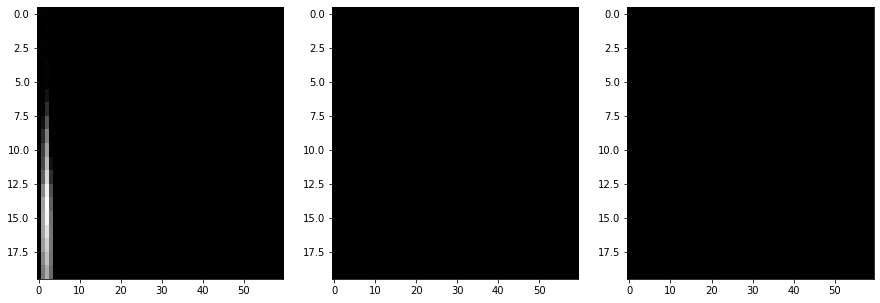

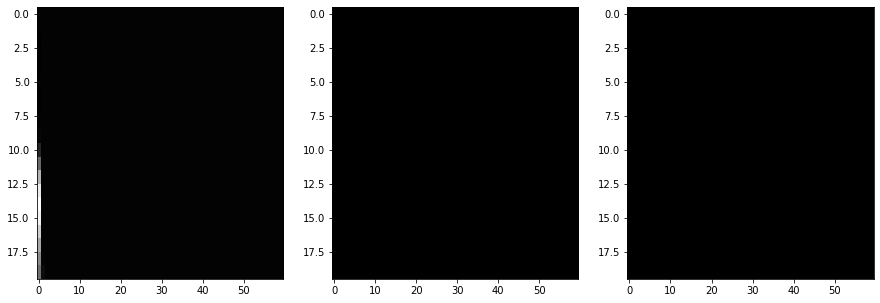

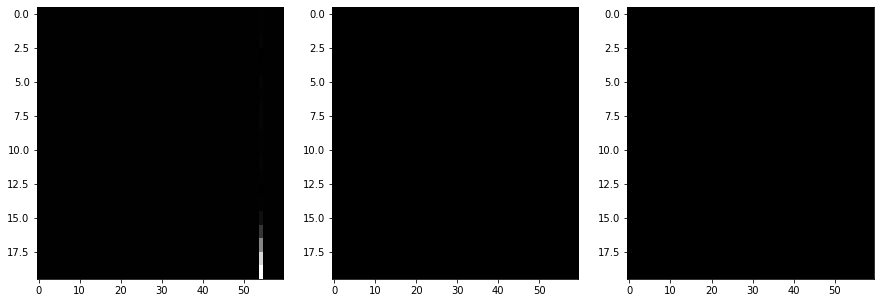

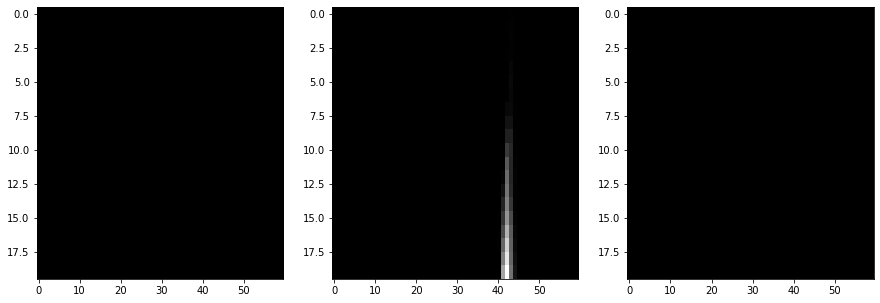

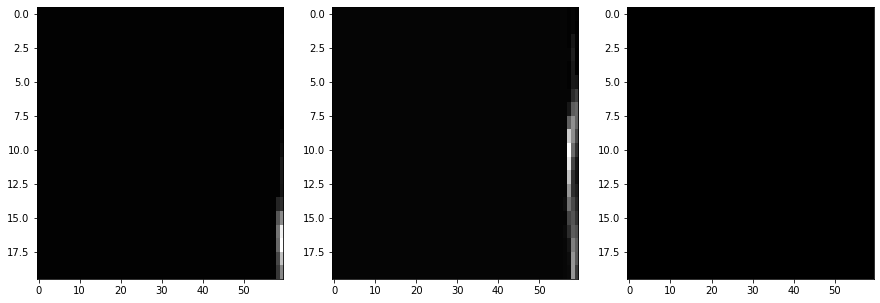

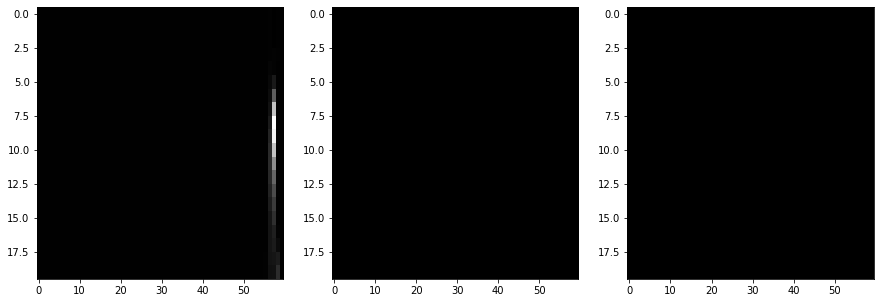

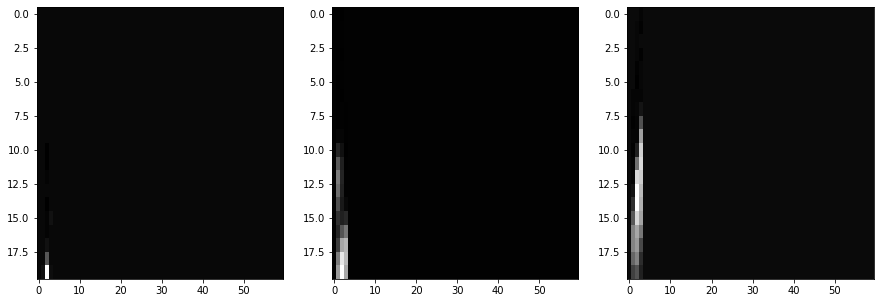

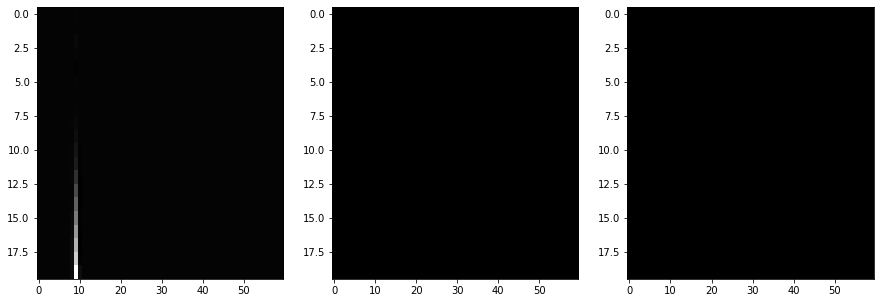

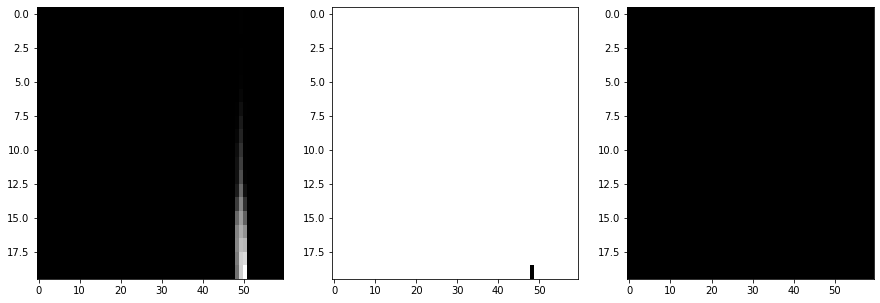

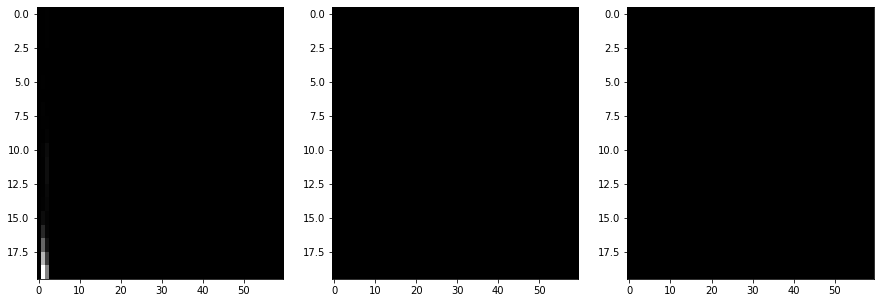

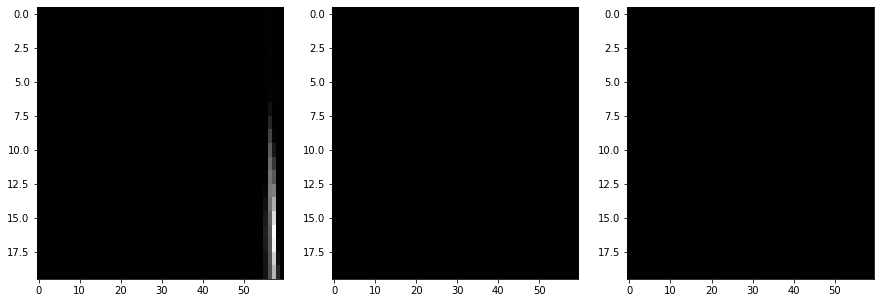

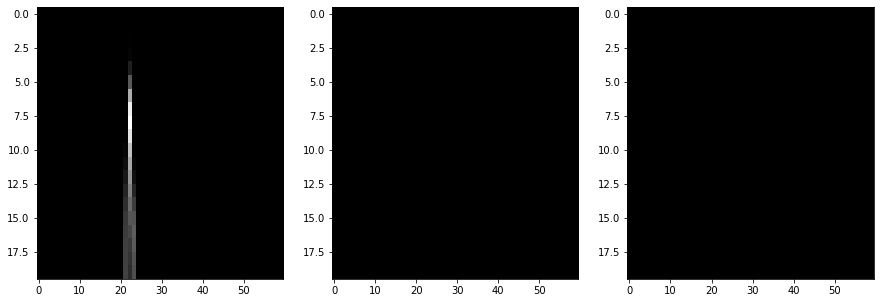

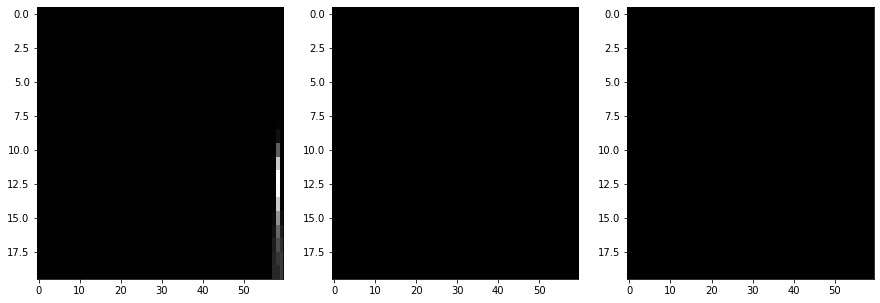

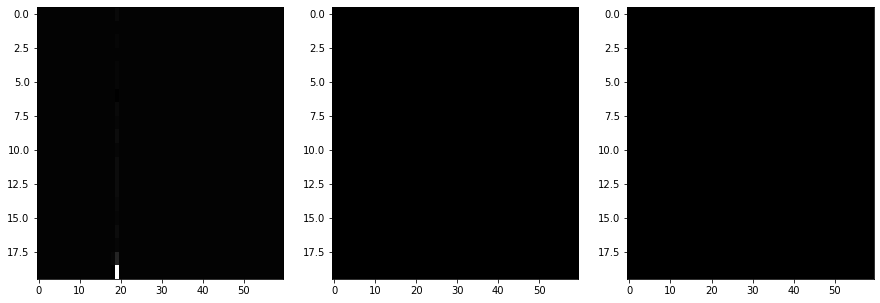

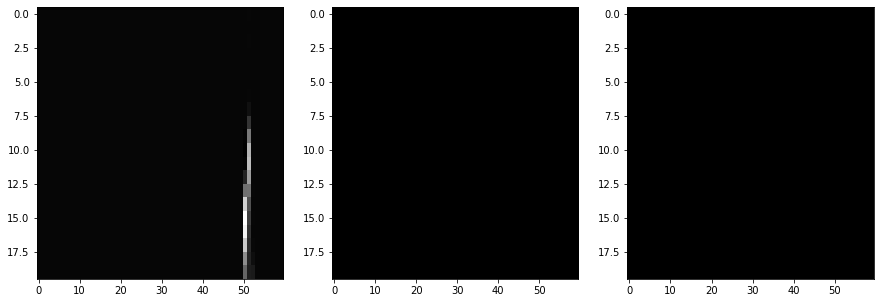

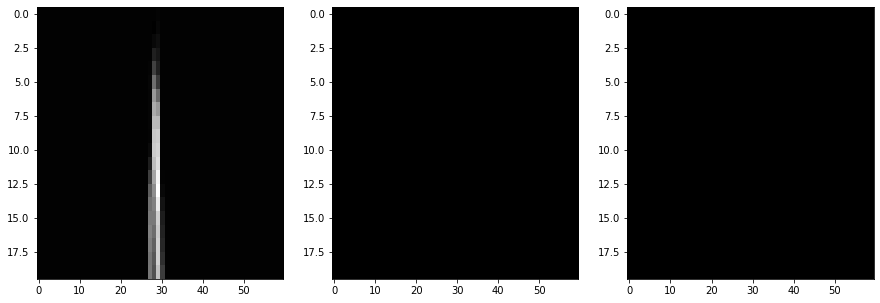

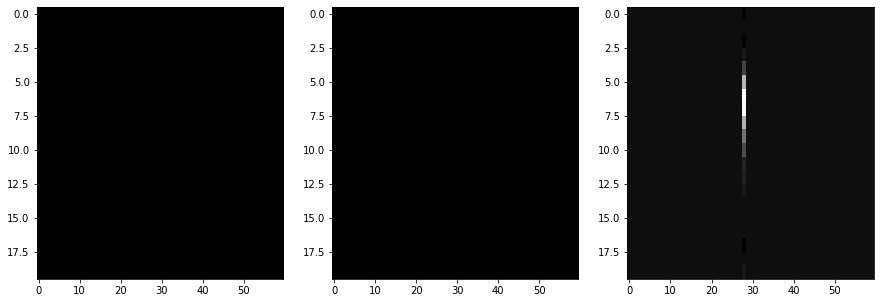

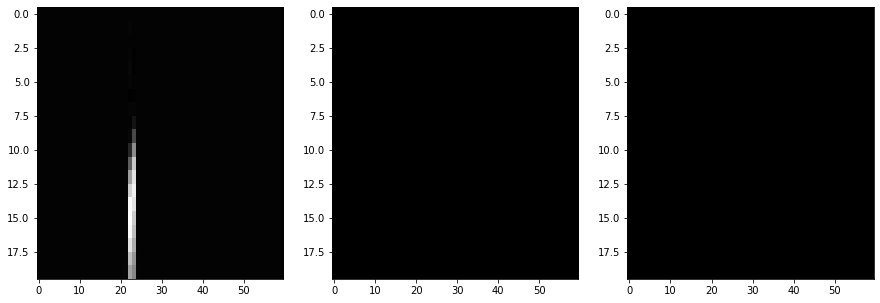

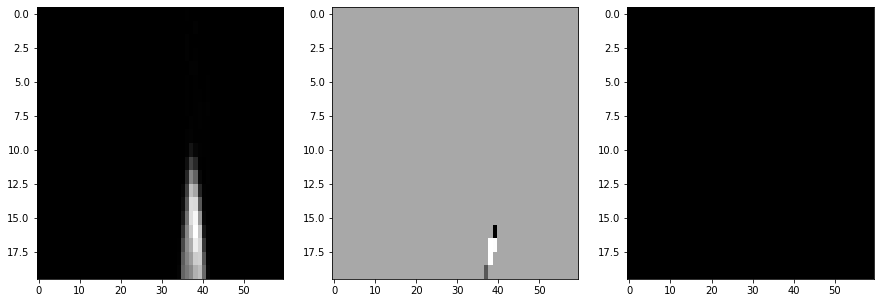

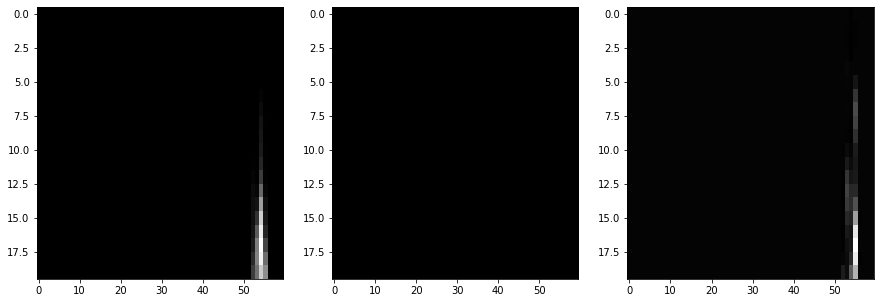

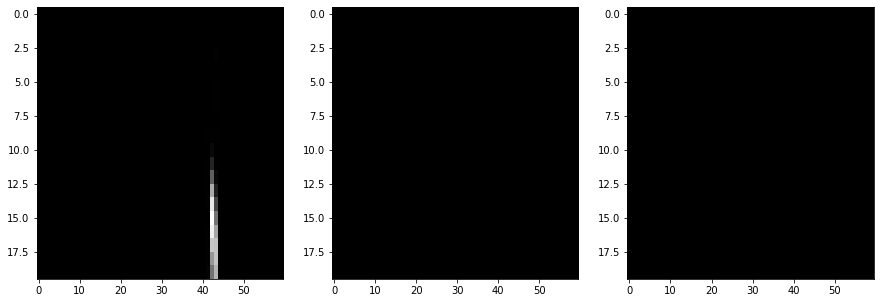

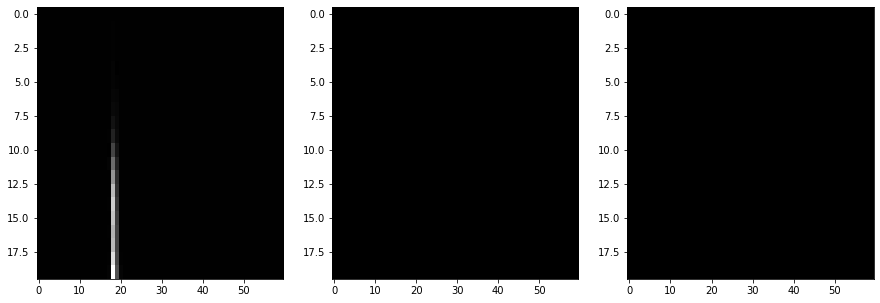

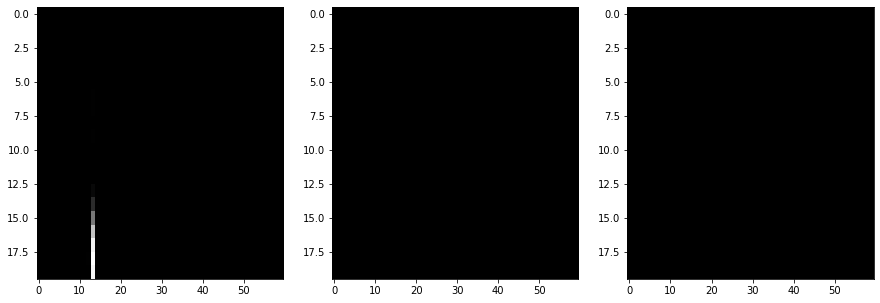

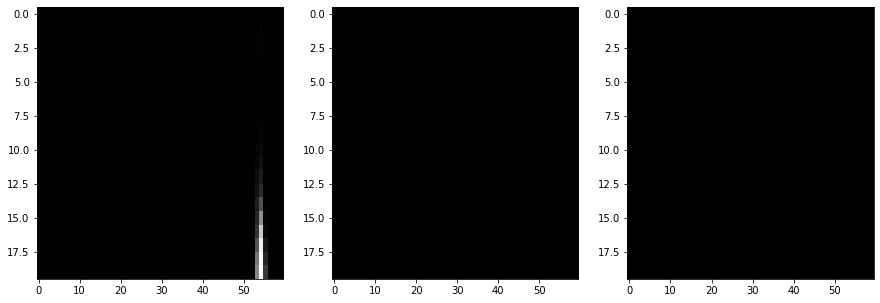

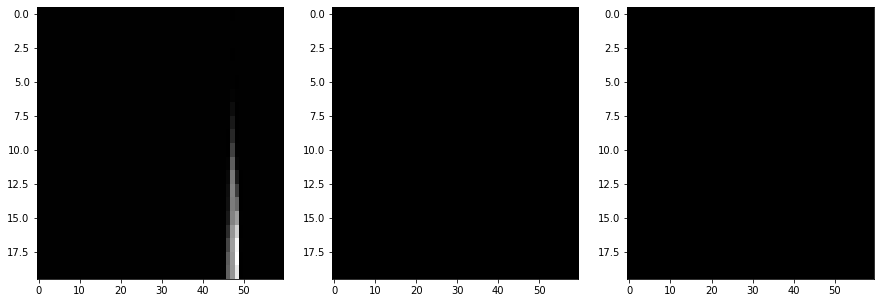

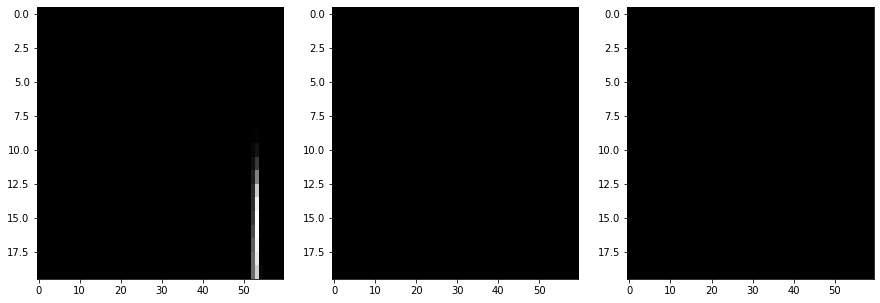

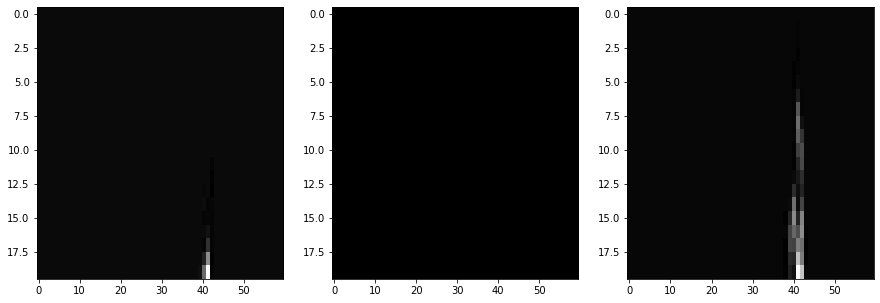

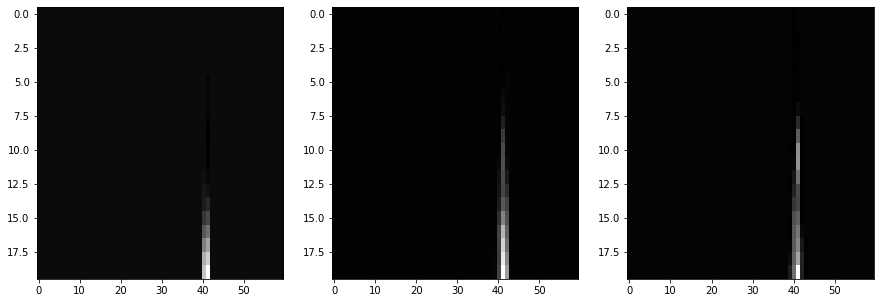

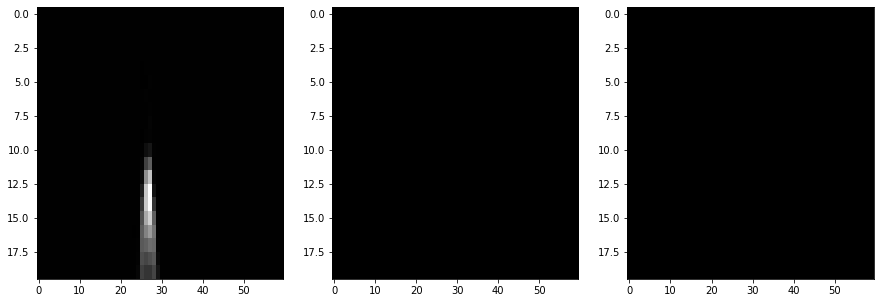

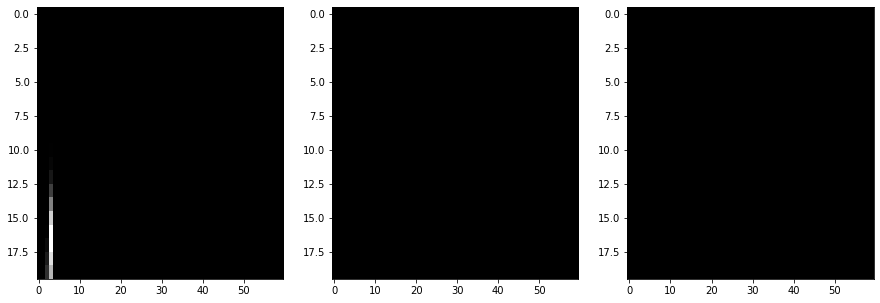

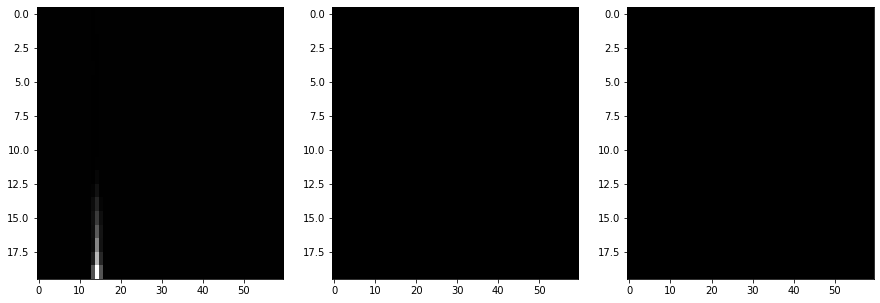

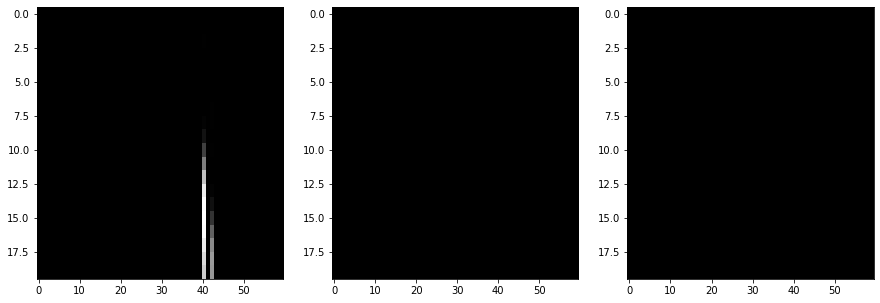

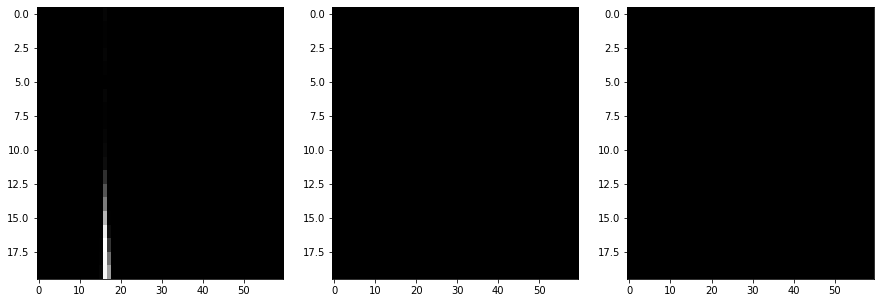

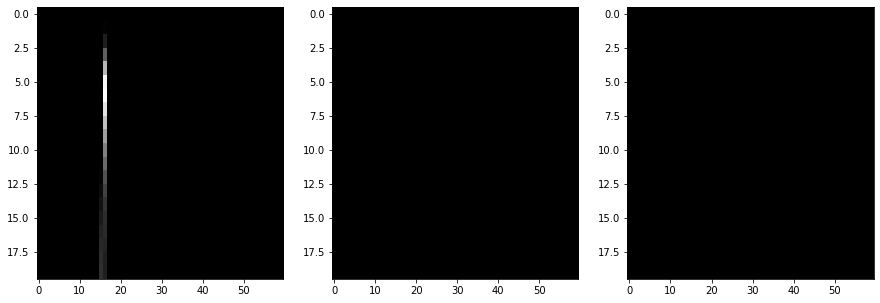

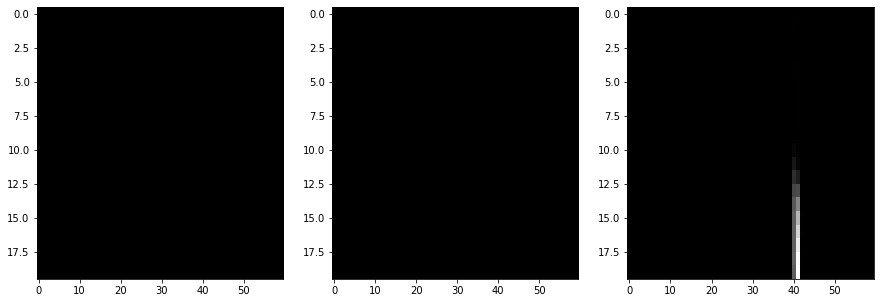

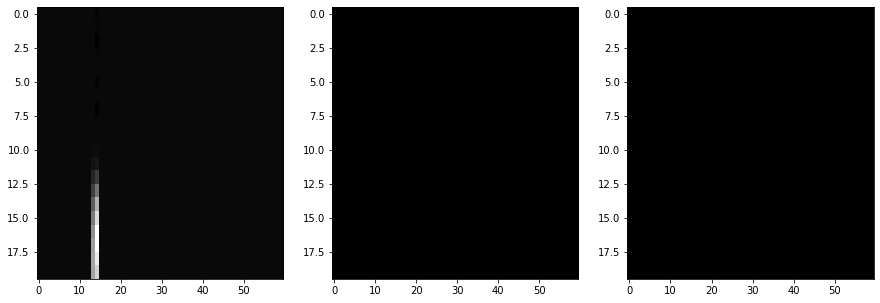

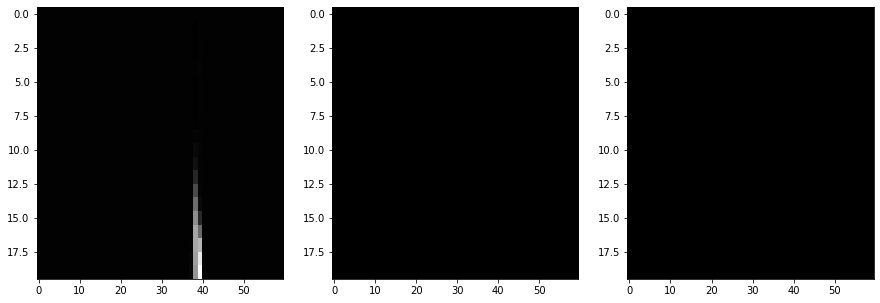

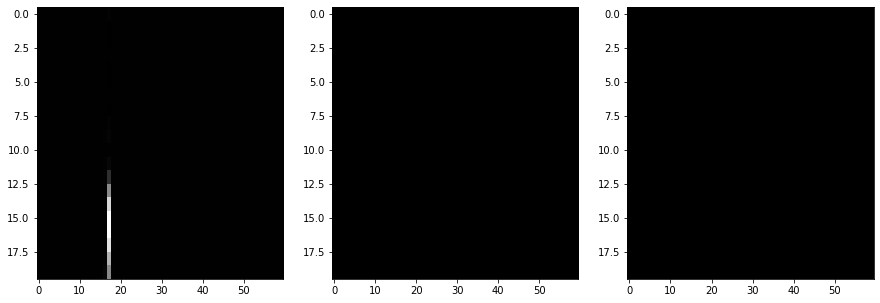

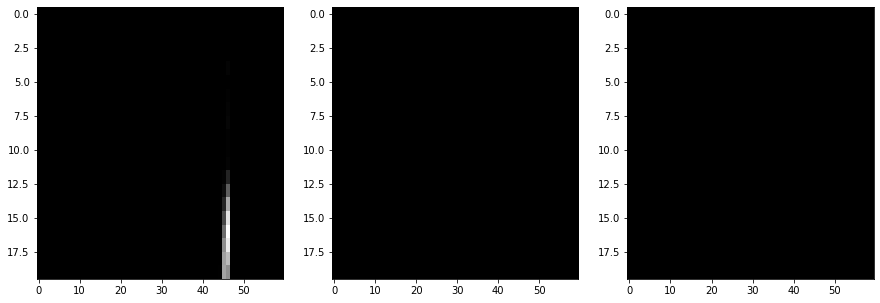

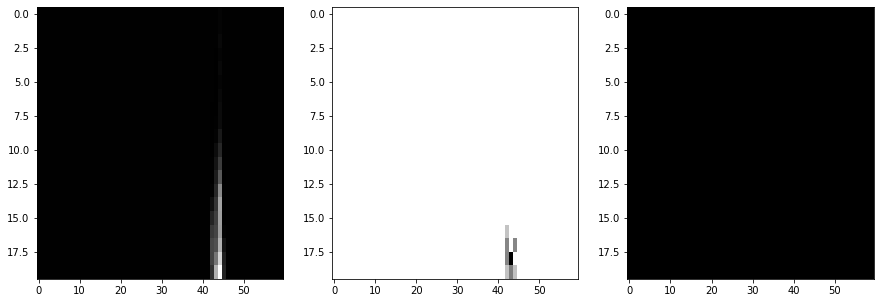

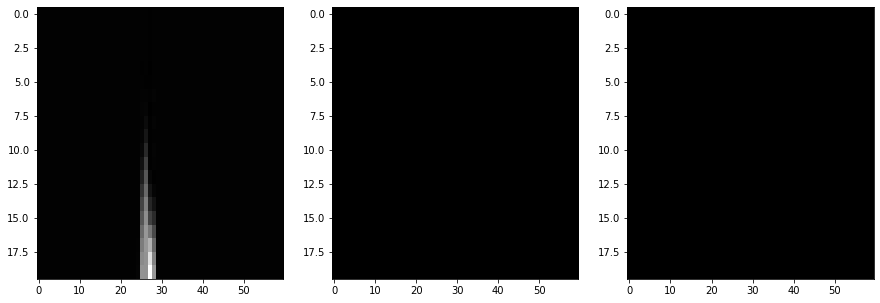

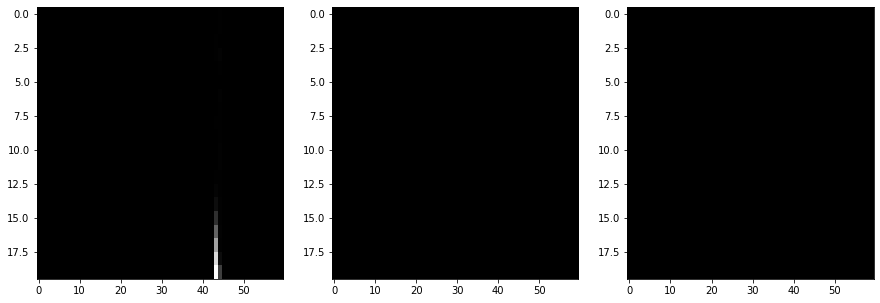

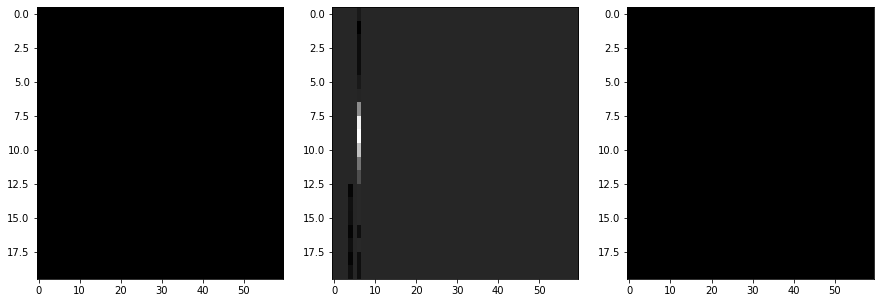

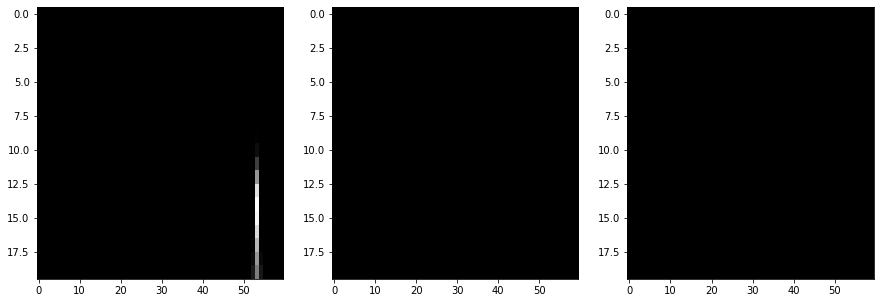

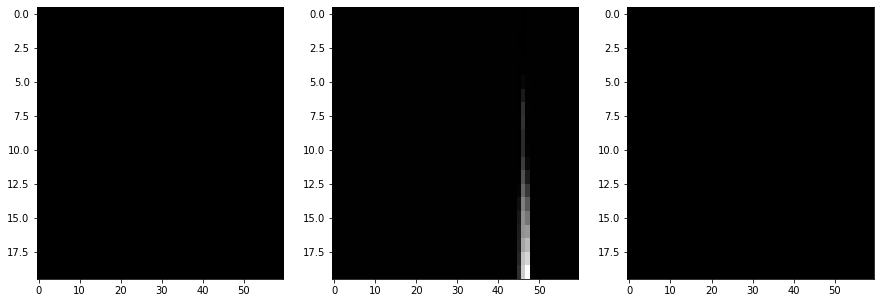

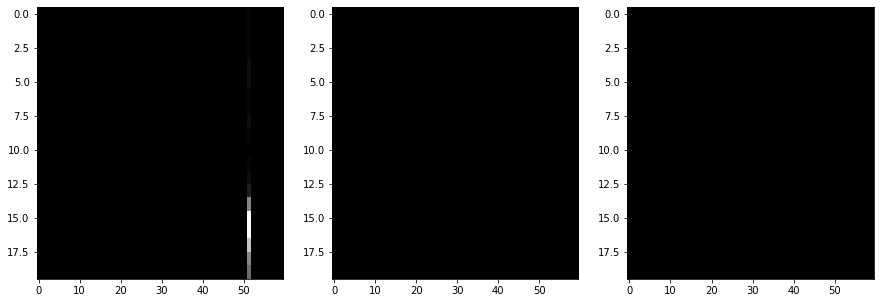

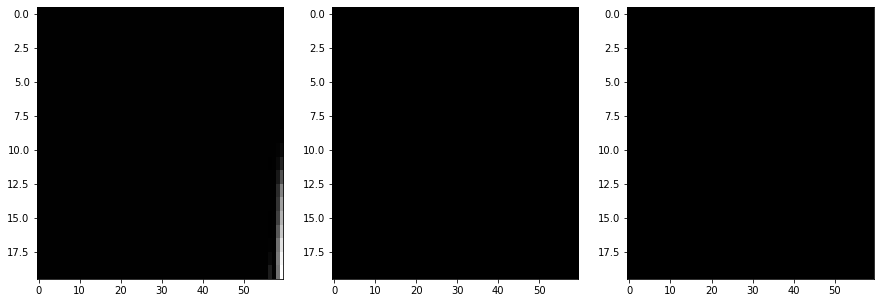

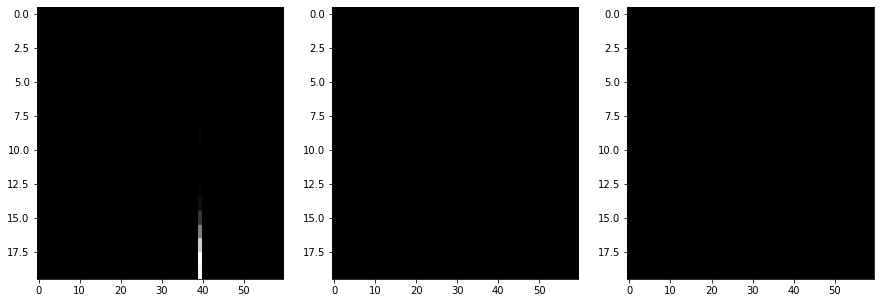

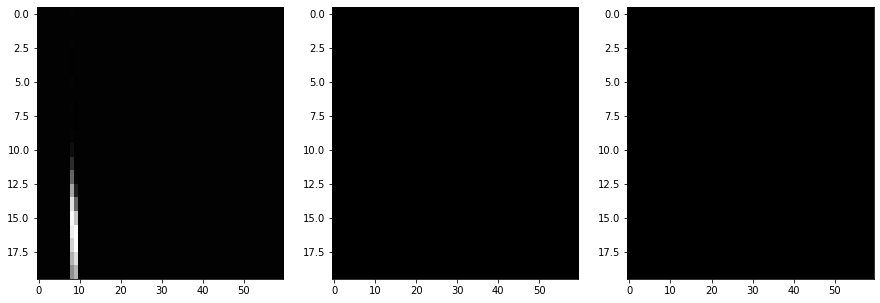

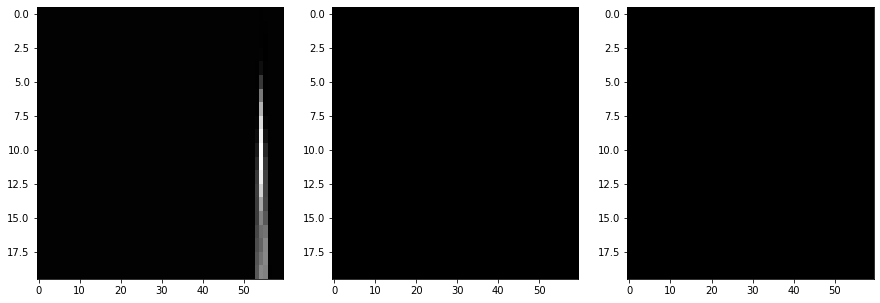

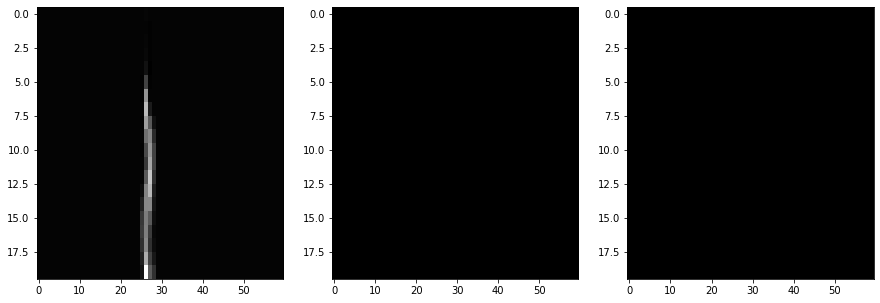

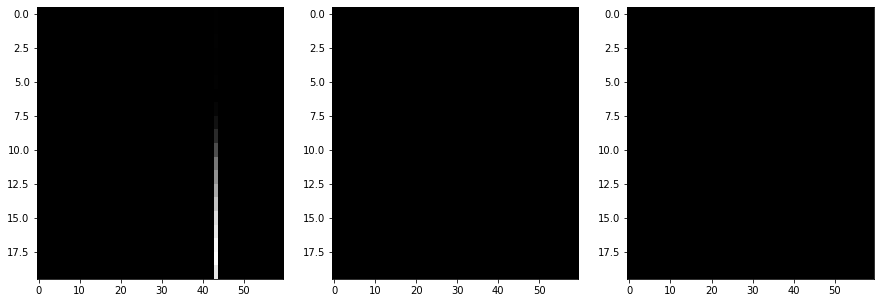

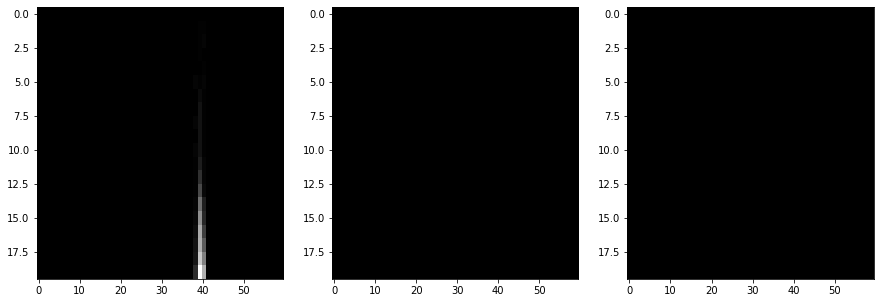

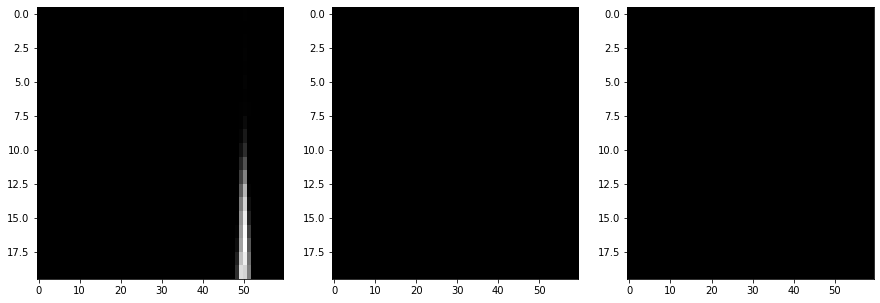

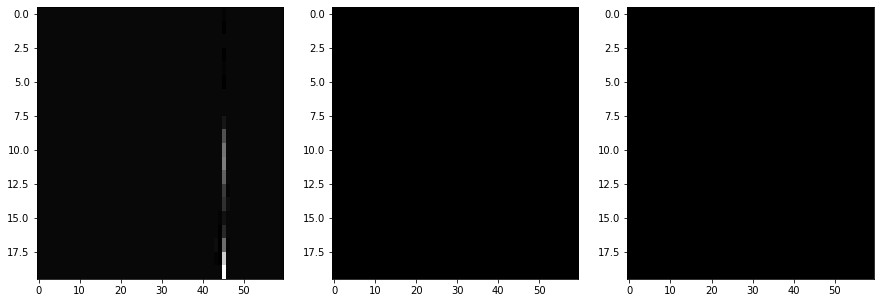

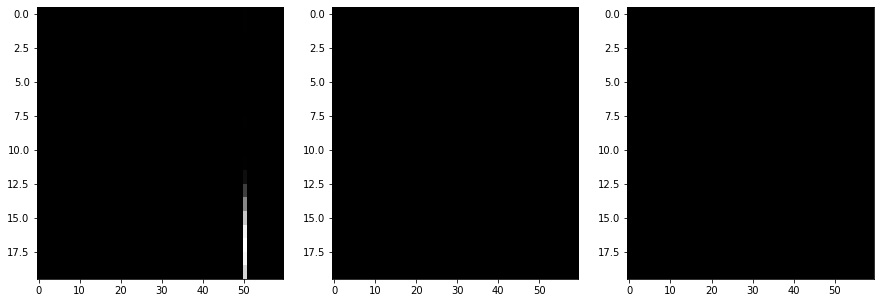

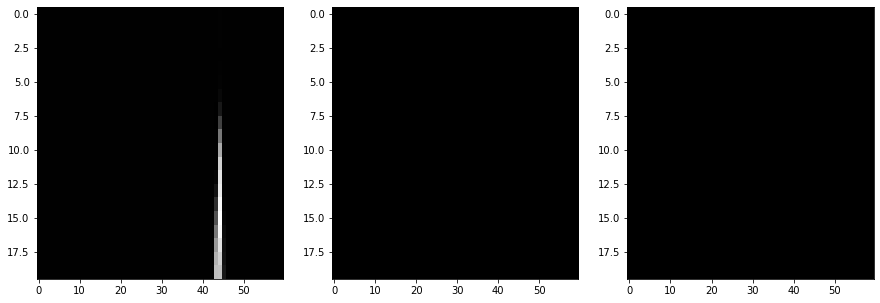

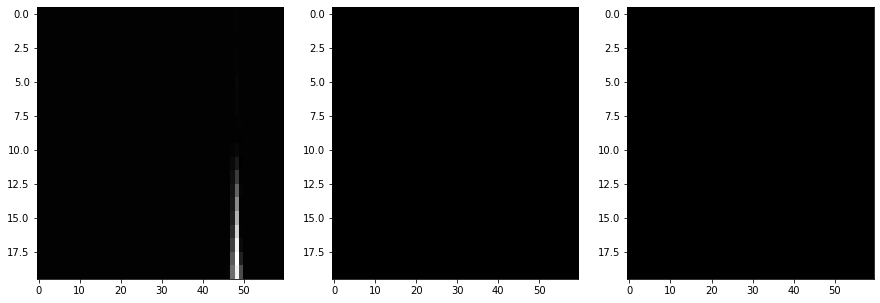

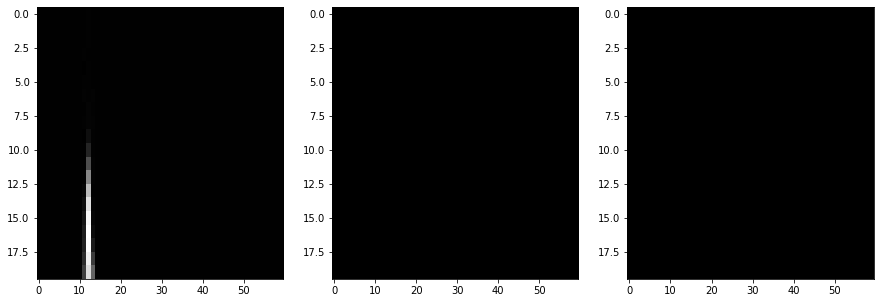

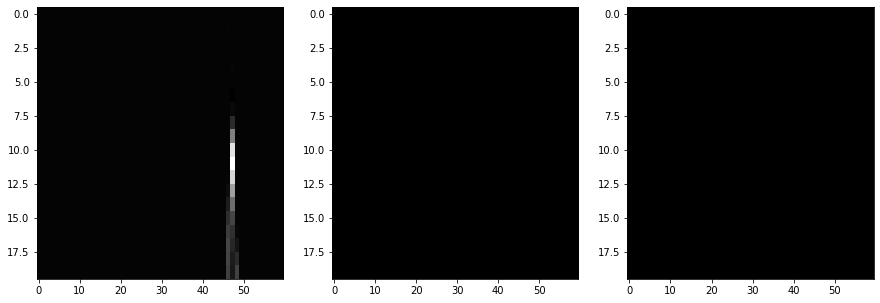

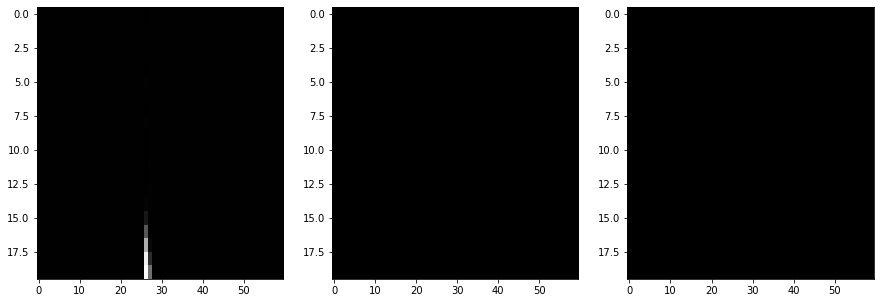

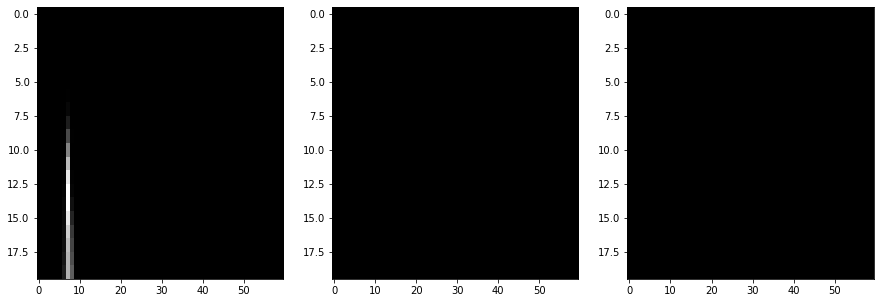

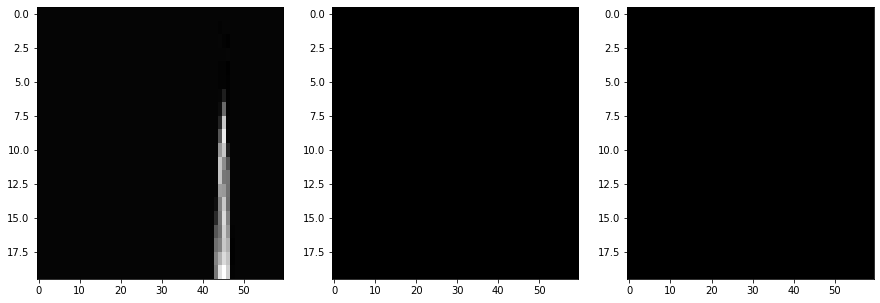

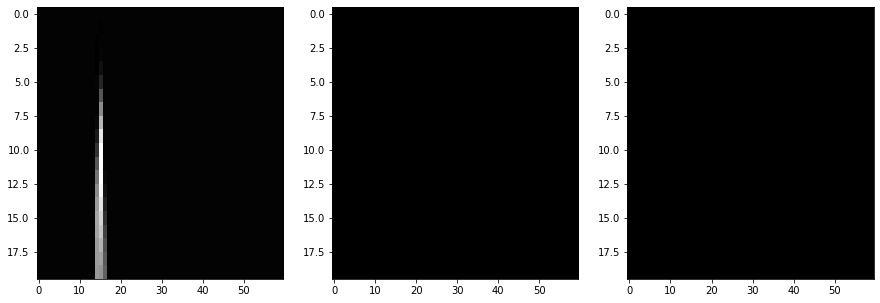

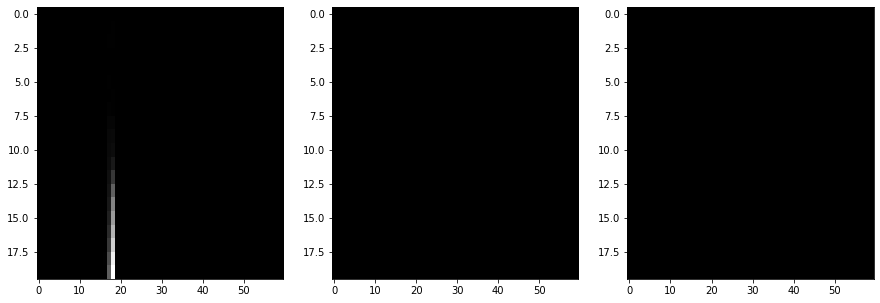

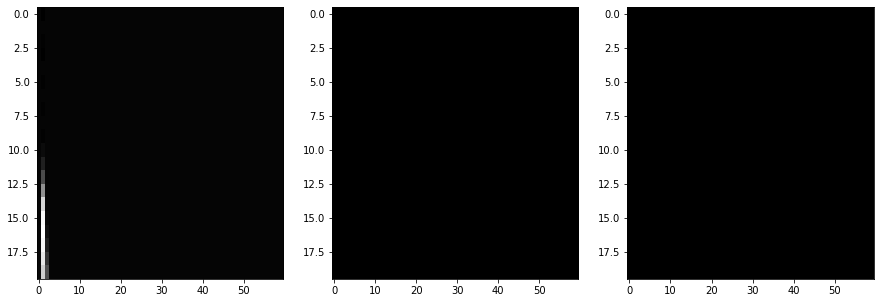

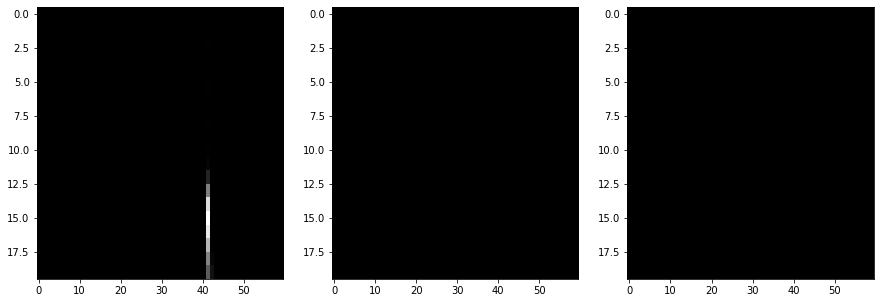

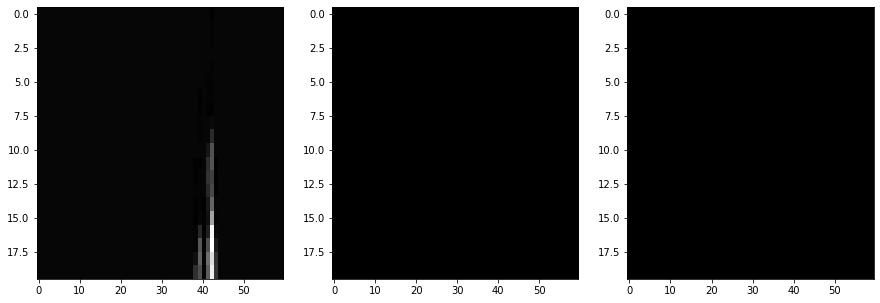

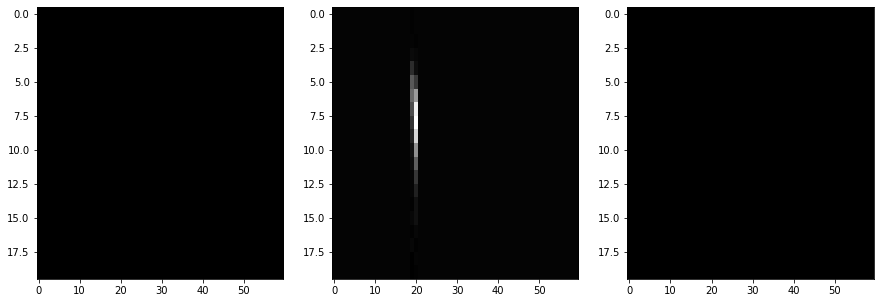

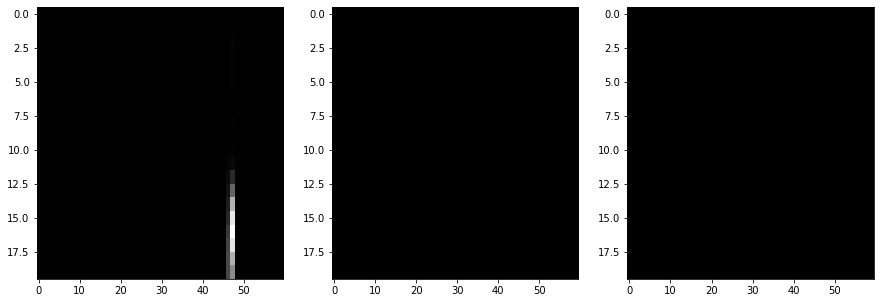

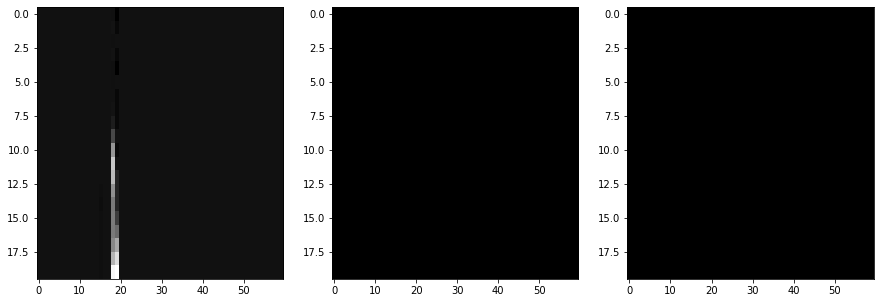

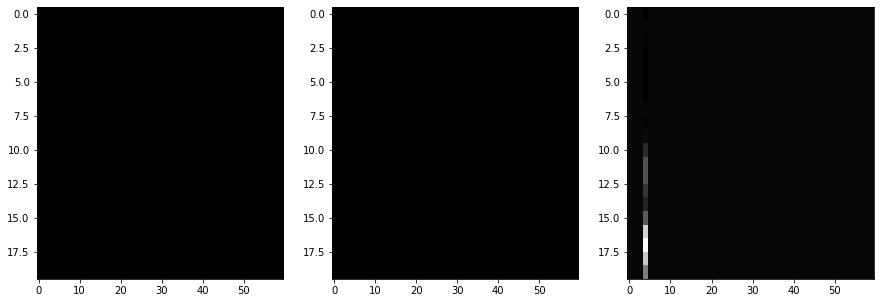

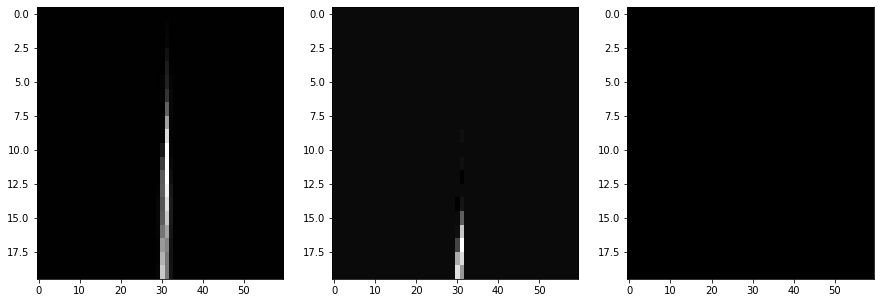

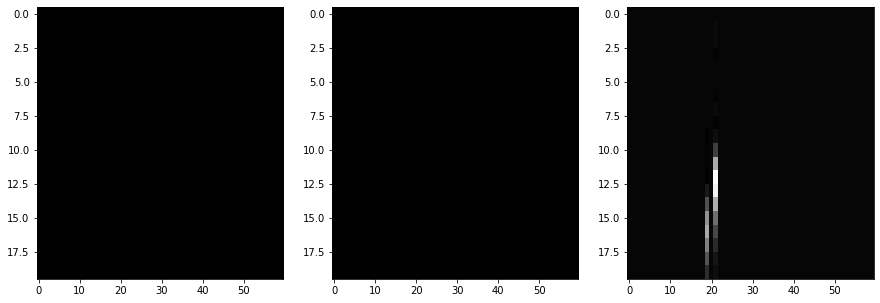

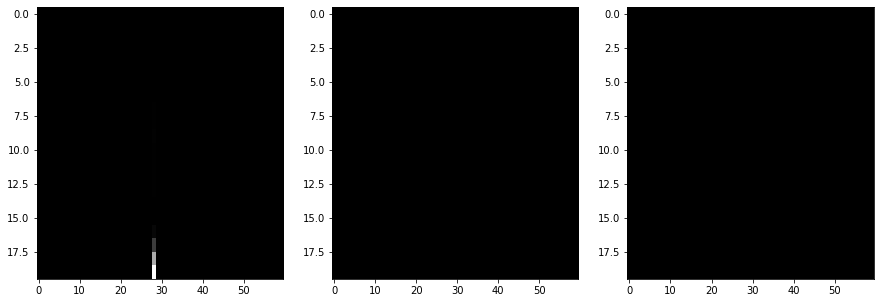

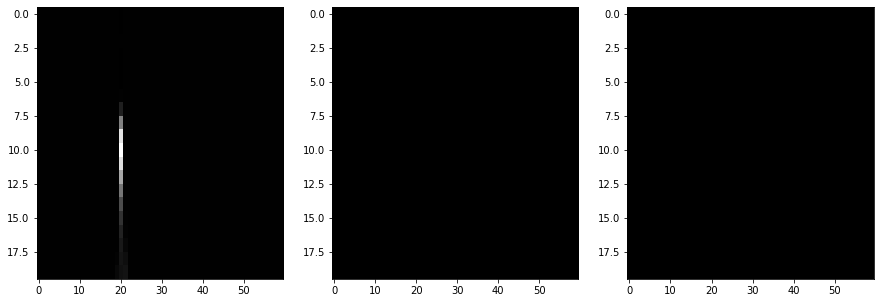

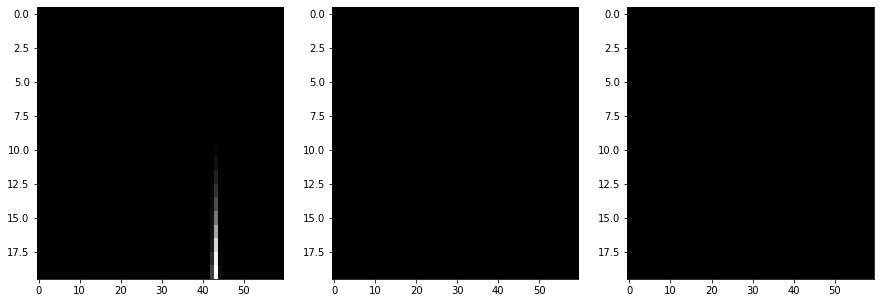

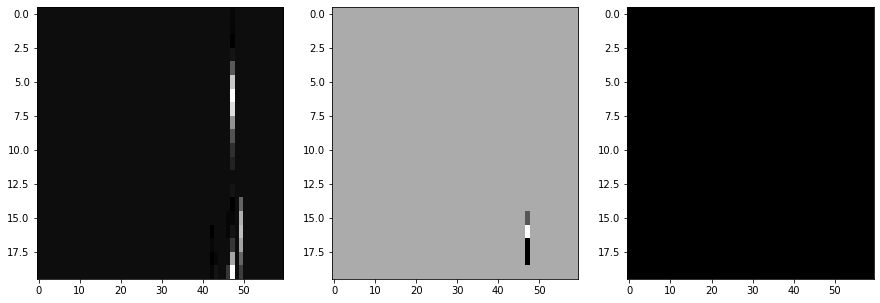

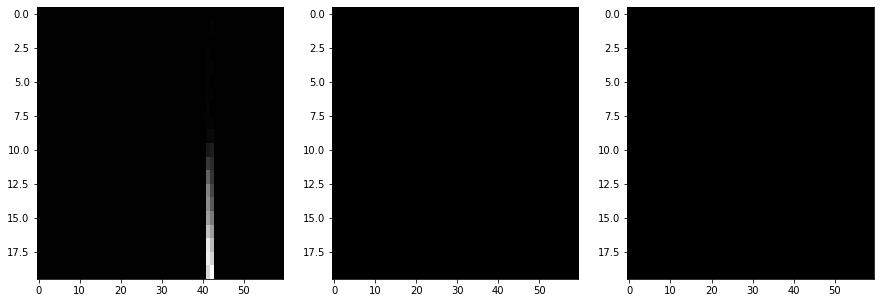

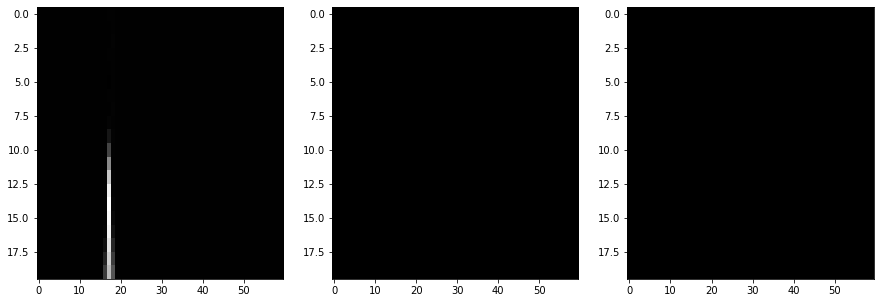

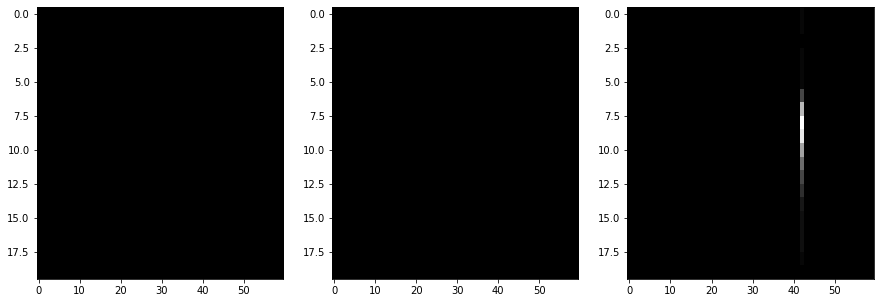

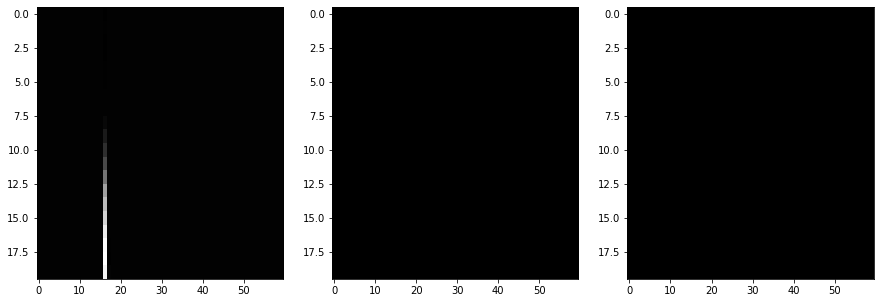

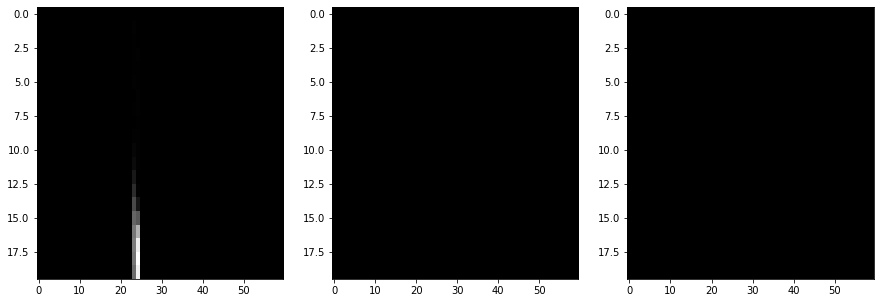

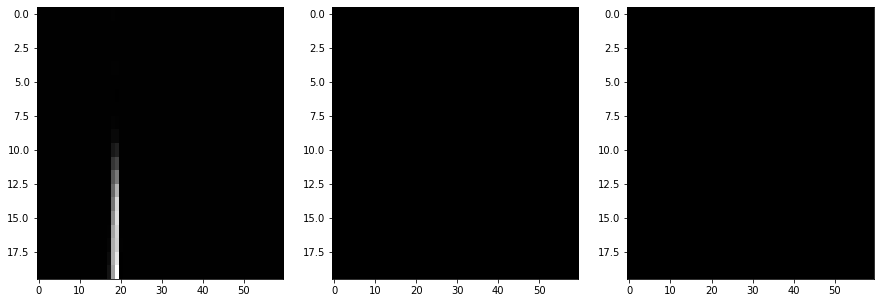

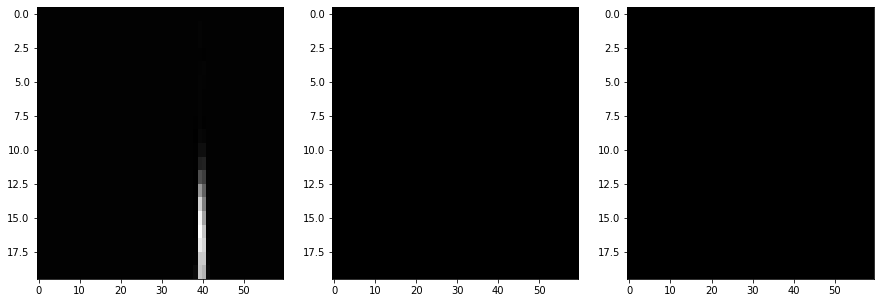

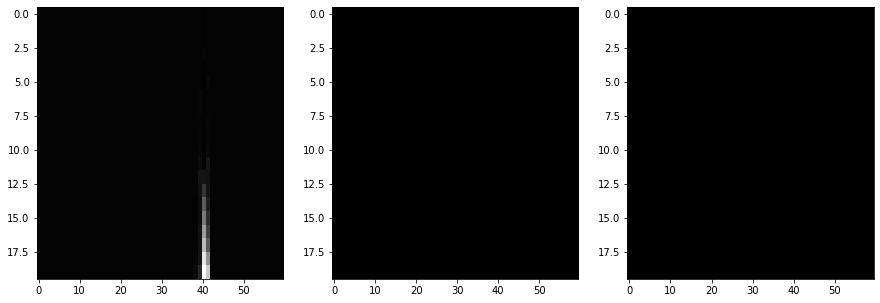

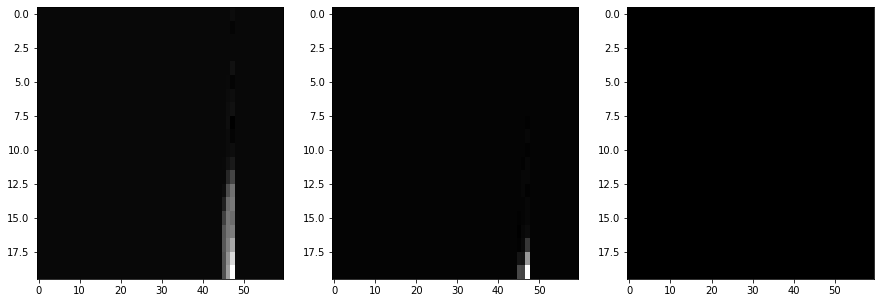

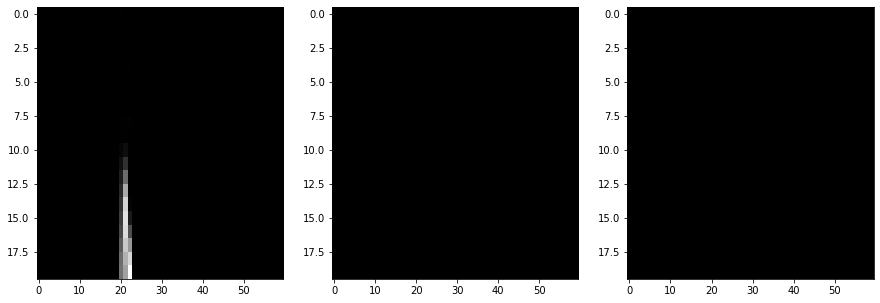

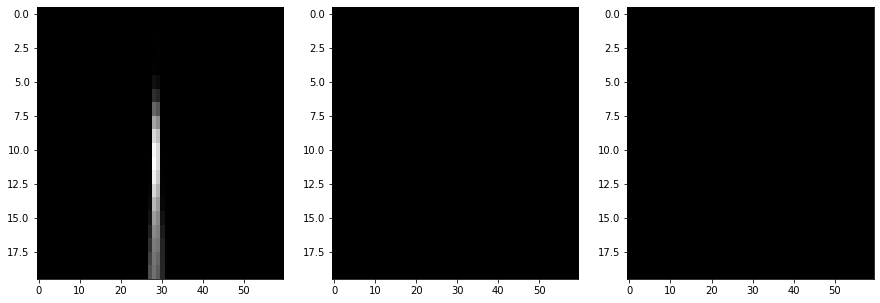

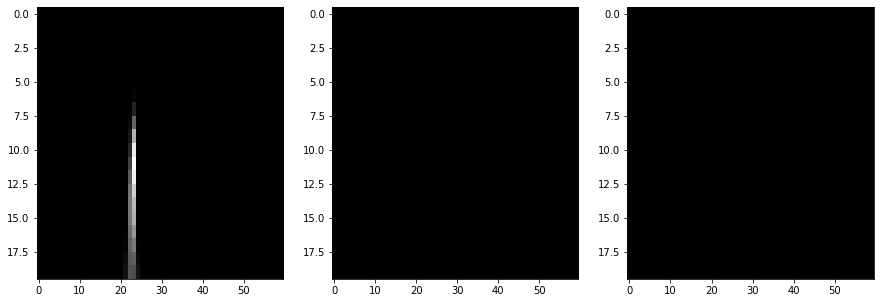

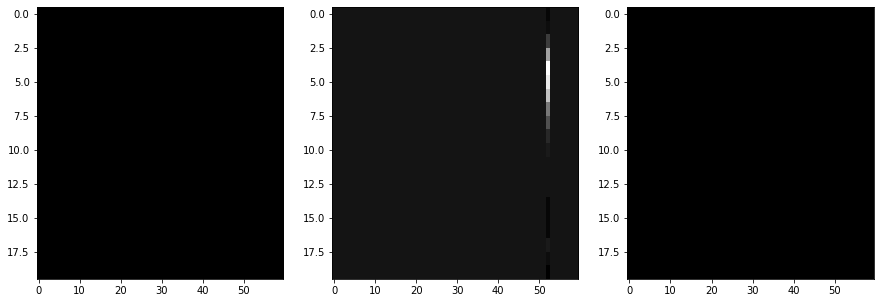

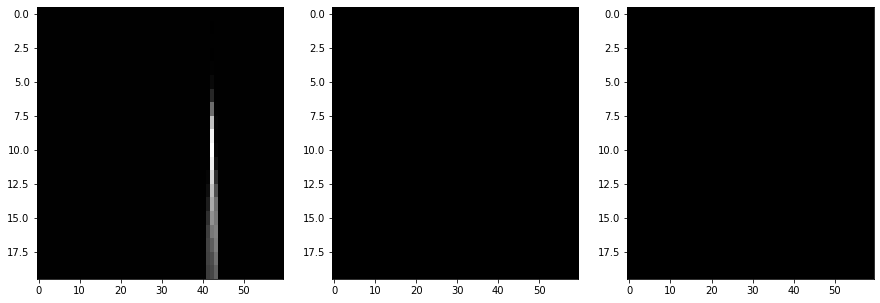

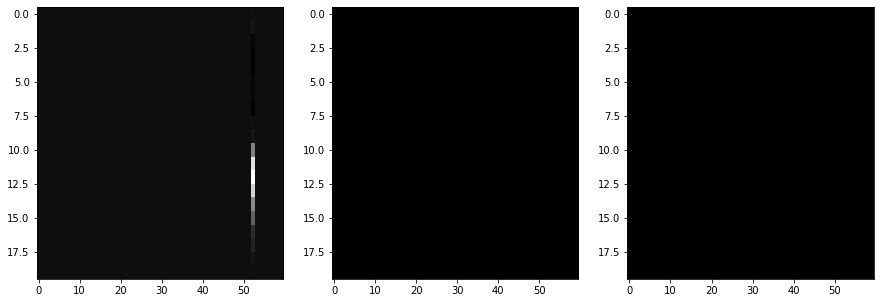

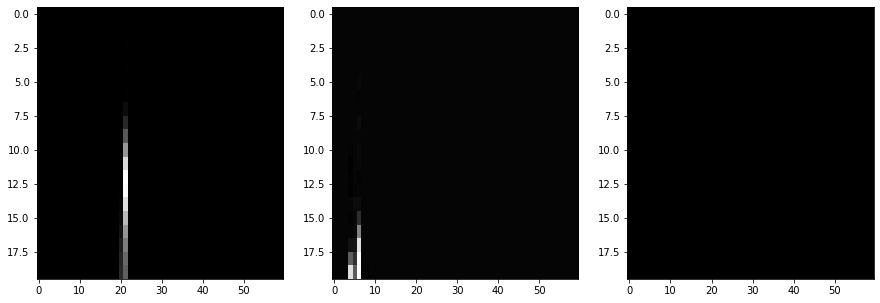

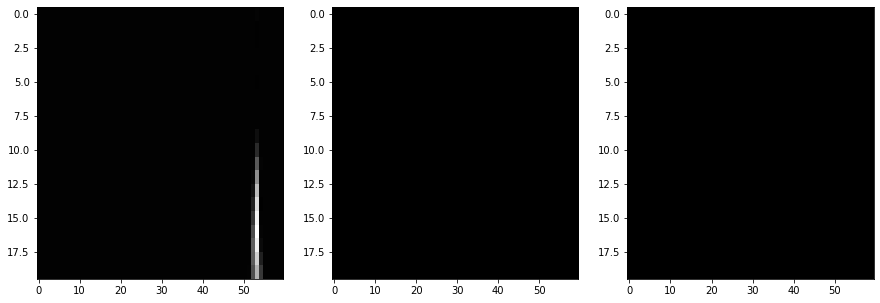

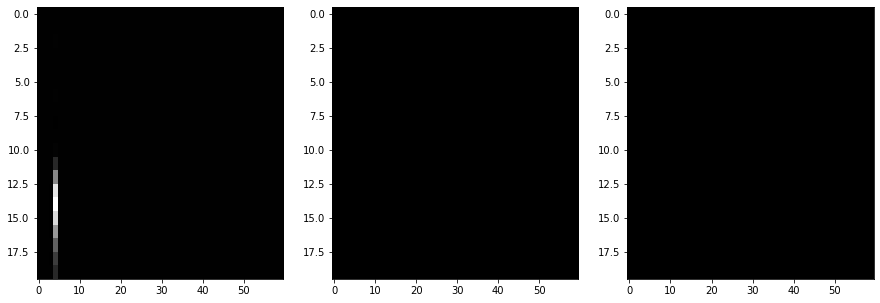

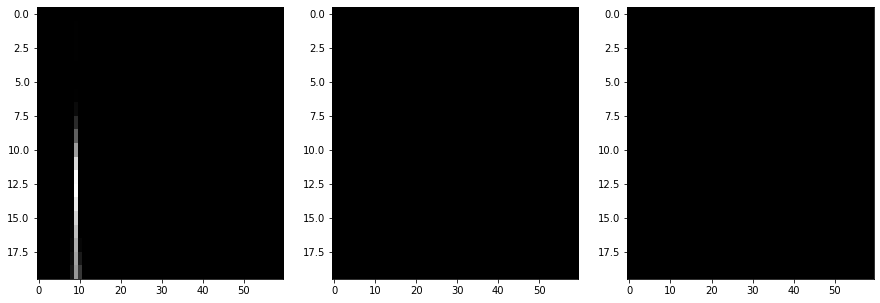

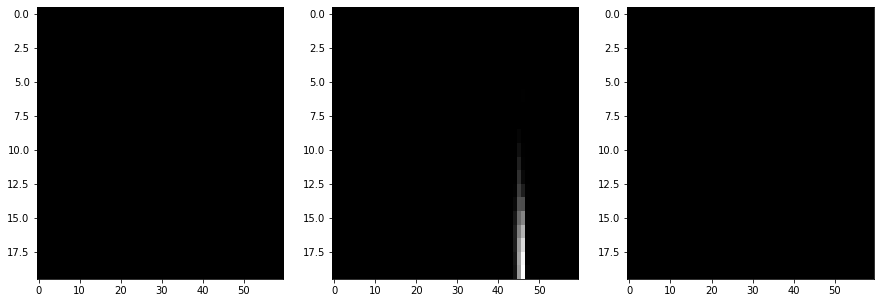

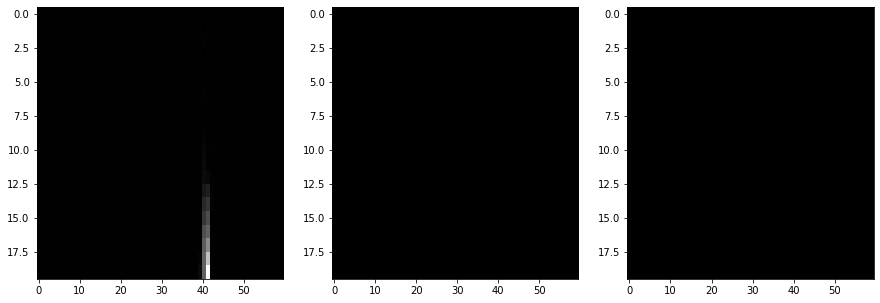

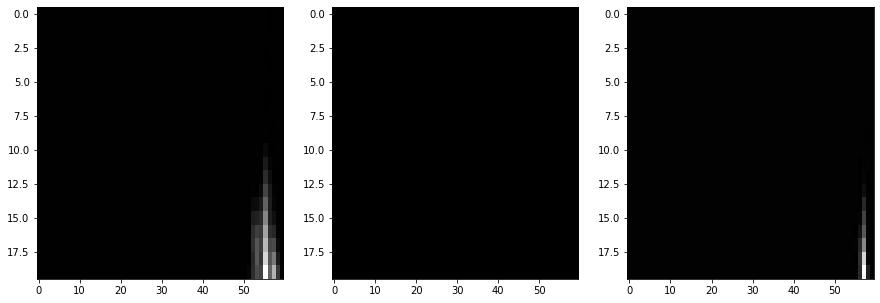

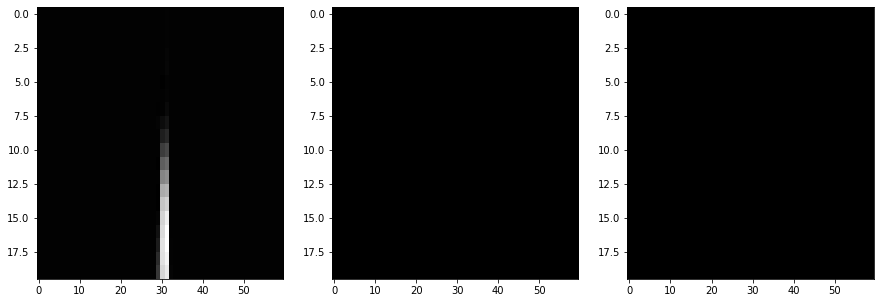

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    if pos >50:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    #pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    cut1=0.56
    cut2=0.6
    for n,e in enumerate(x):
        if pos >100:
            break
        ch = (cut1 <= pred_n1[n]) and (pred_n1[n] <= cut2) and (cut1 <= pred_n1[n]) and (pred_n4[n] <= cut2)
        #print(pos)
        if ch:
            pos = pos +1
            fig = plt.figure(figsize=(15, 5))
            ax1 = fig.add_subplot(131)
            ax1.imshow(e['image'][0][:20,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax2 = fig.add_subplot(132)
            ax2.imshow(e['image'][0][:20,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
            ax3 = fig.add_subplot(133)
            ax3.imshow(e['image'][0][:20,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
end = time.time()
print(end - start)

NuTau_1_1_1
#.npz files =  1
/home/dup193/work/double_pulse/data/images_3str/Images_NuTau_1_1_1_data.npz (12960, 1)


/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


282.8898961544037


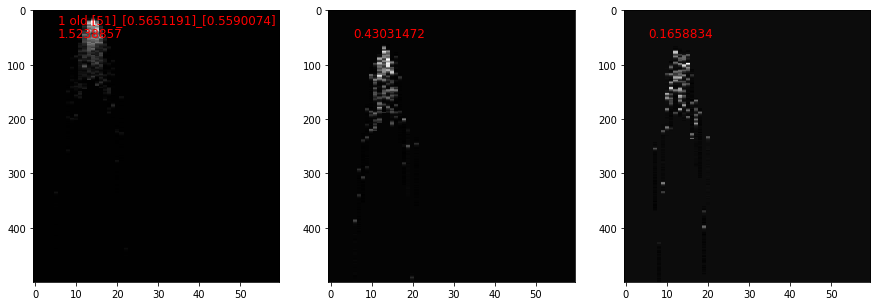

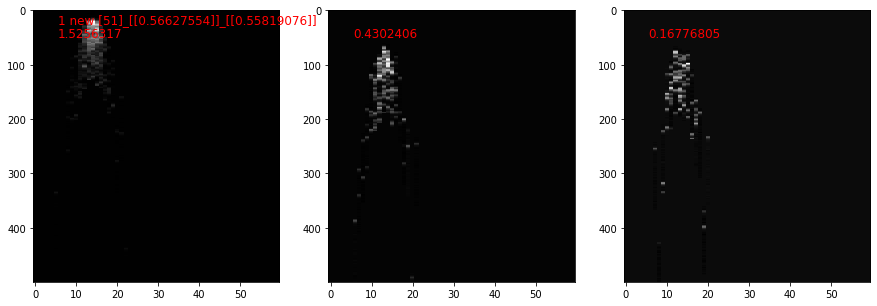

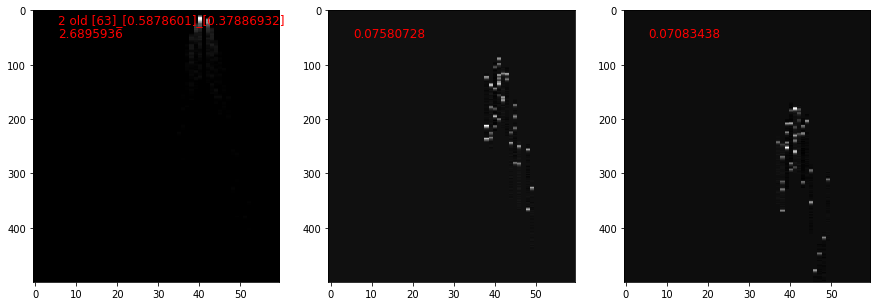

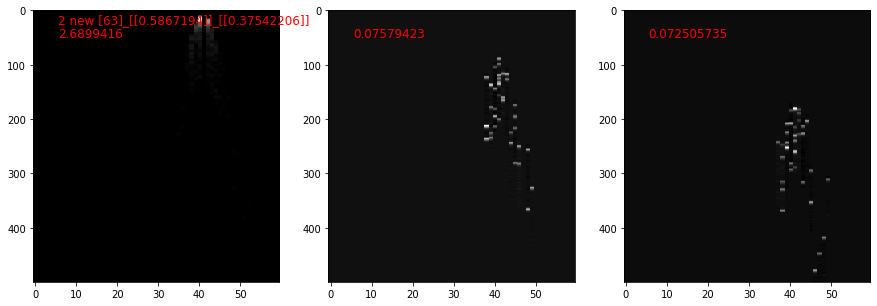

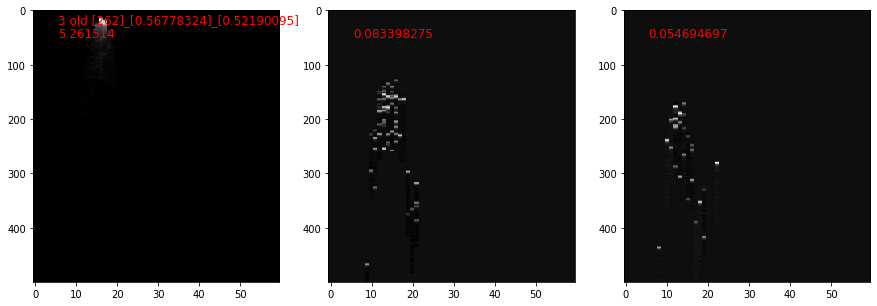

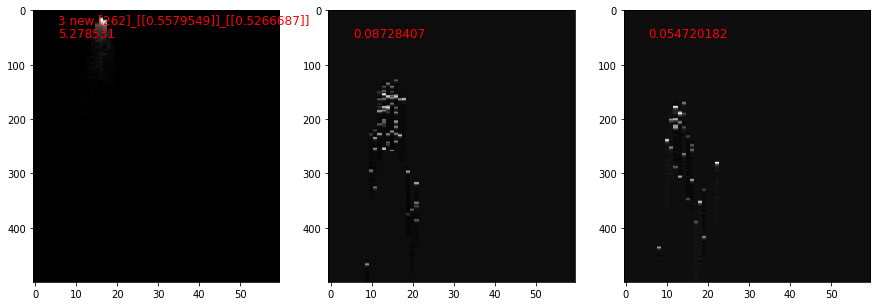

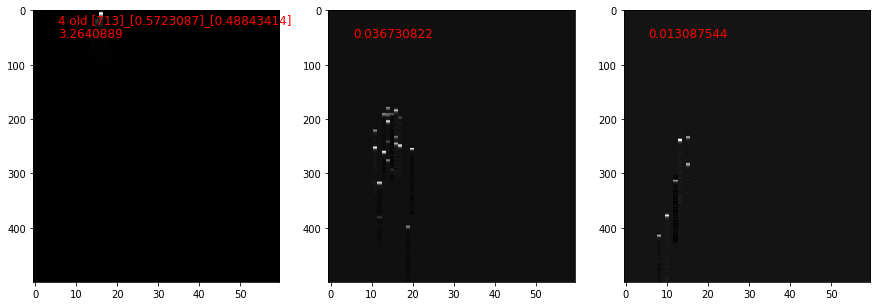

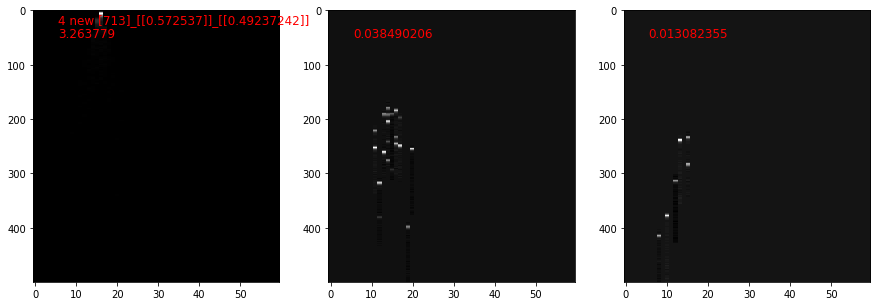

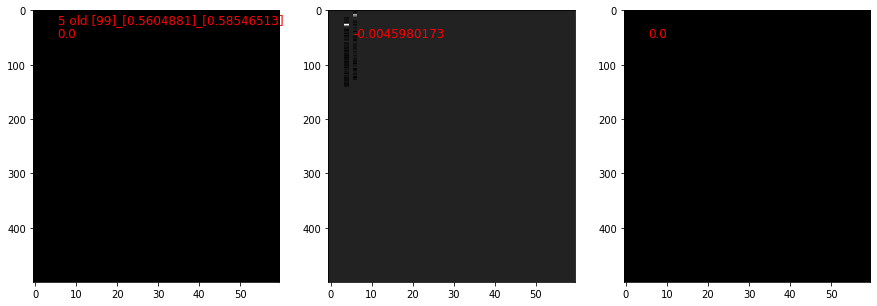

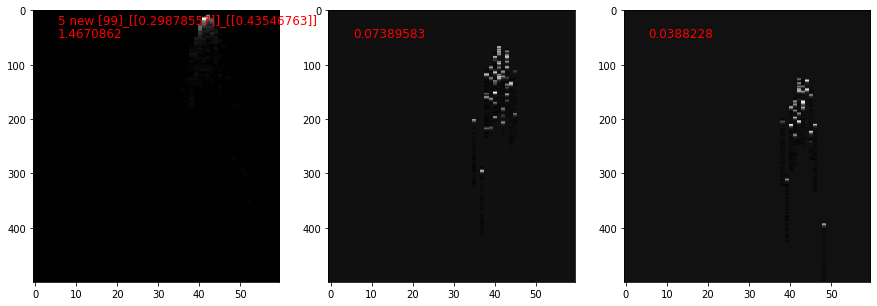

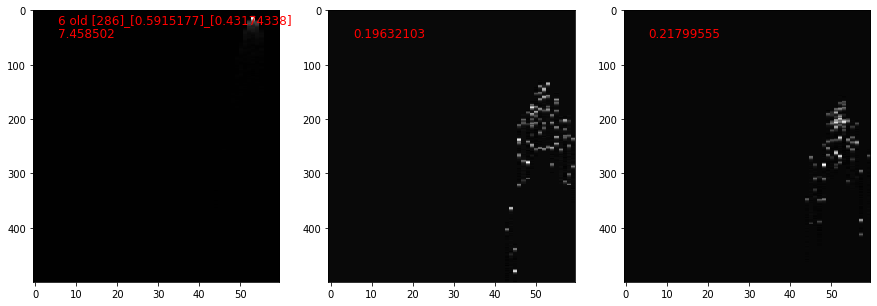

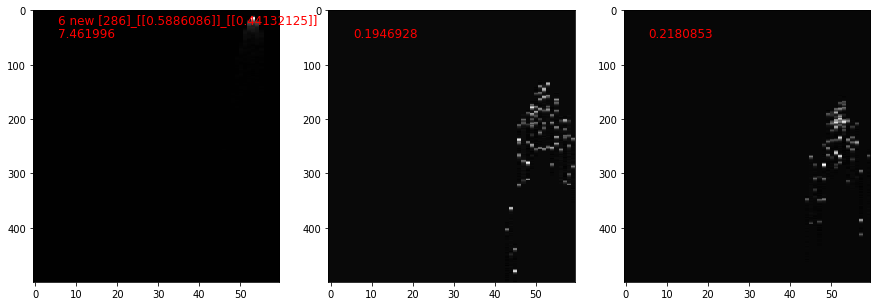

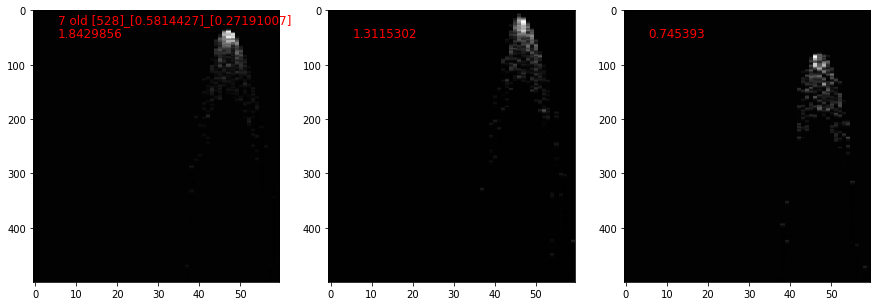

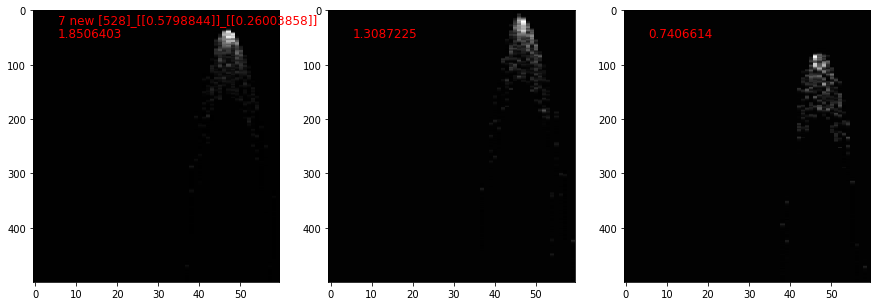

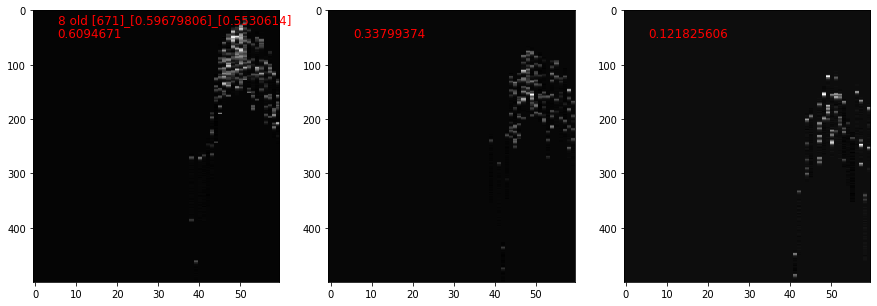

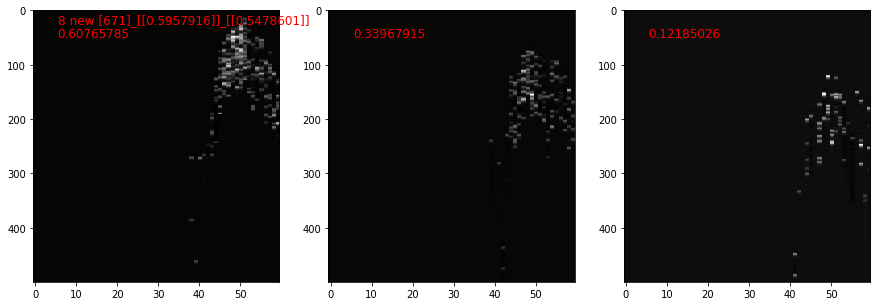

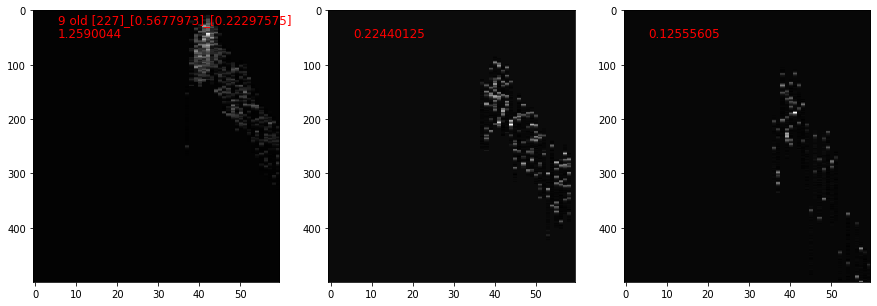

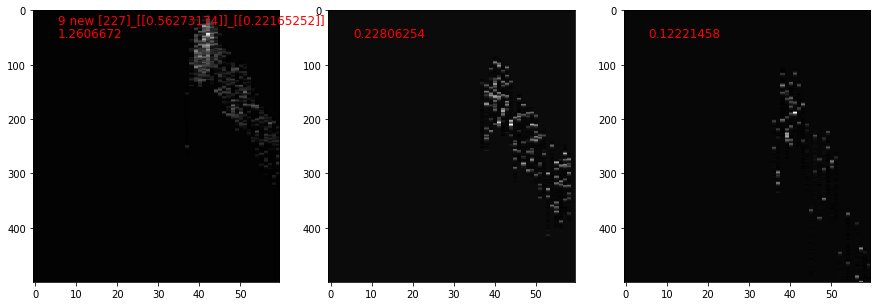

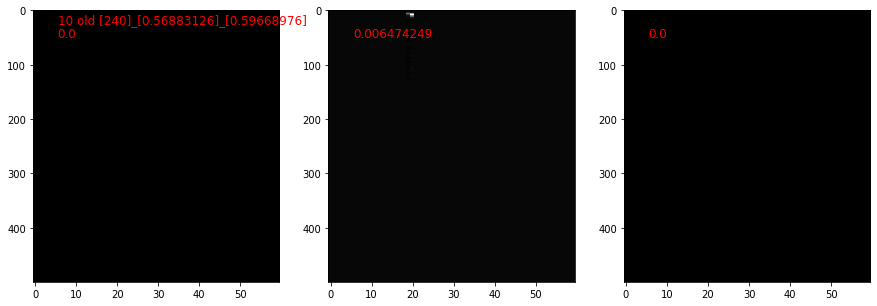

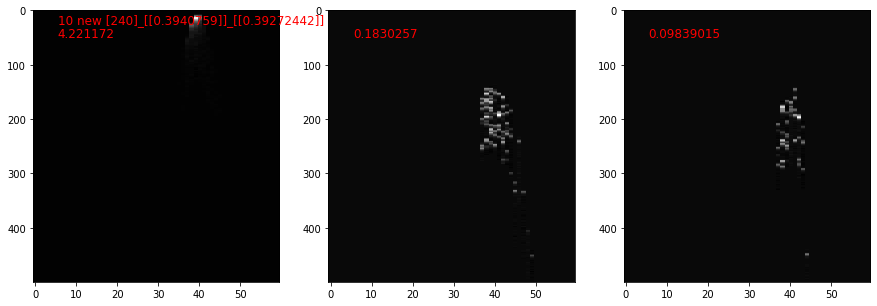

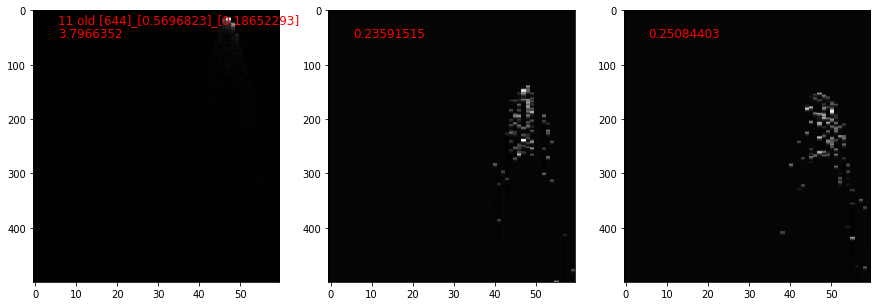

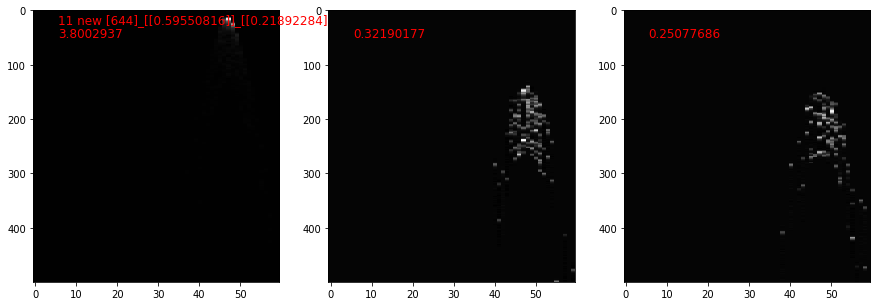

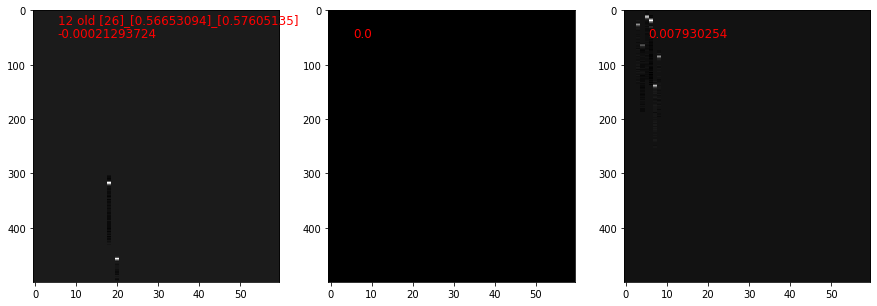

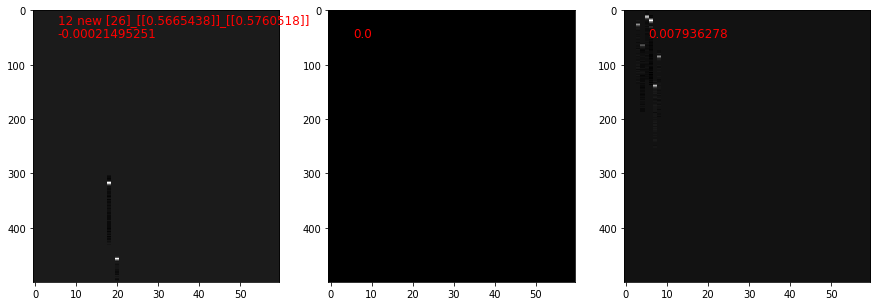

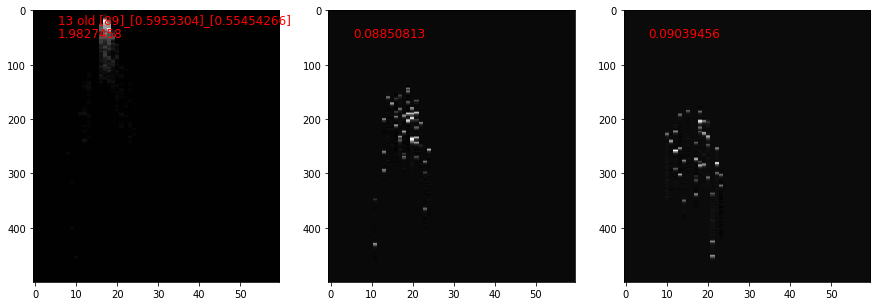

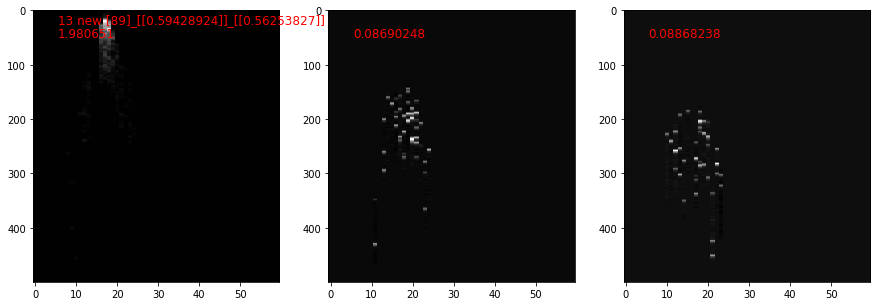

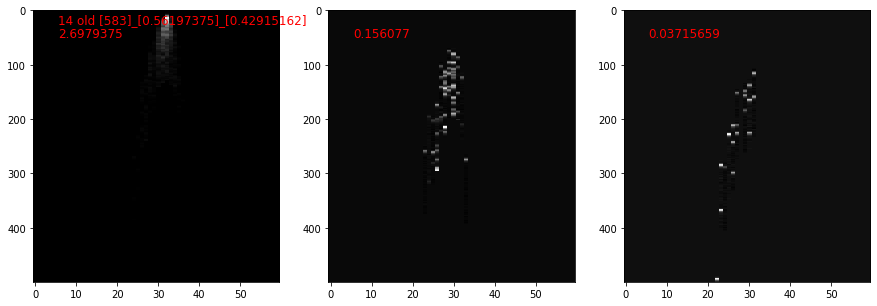

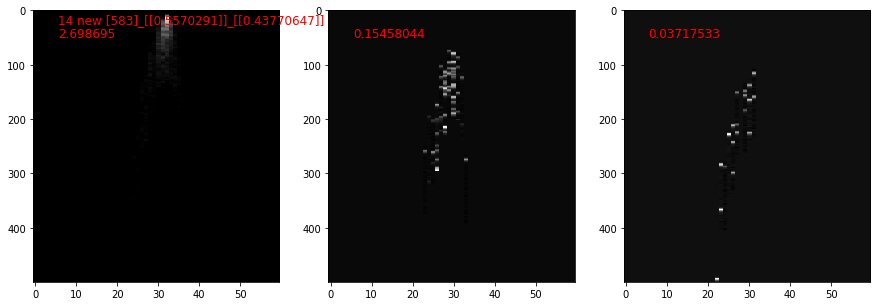

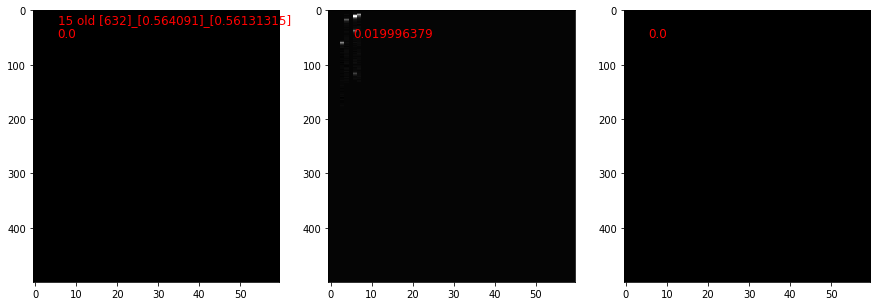

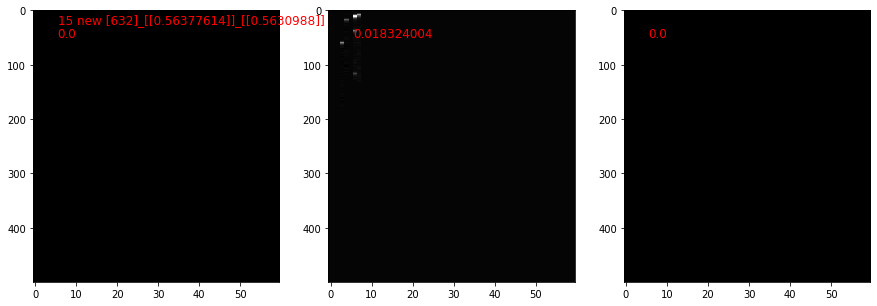

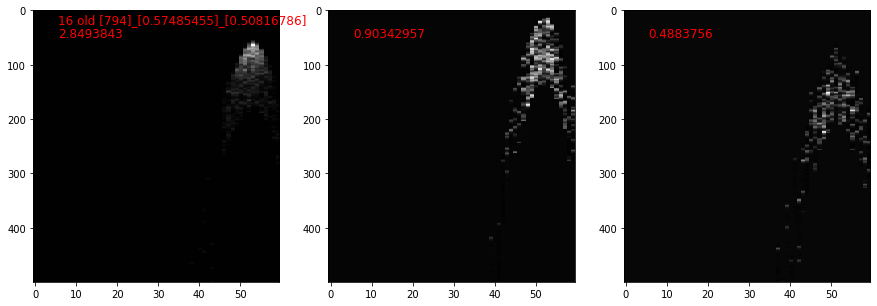

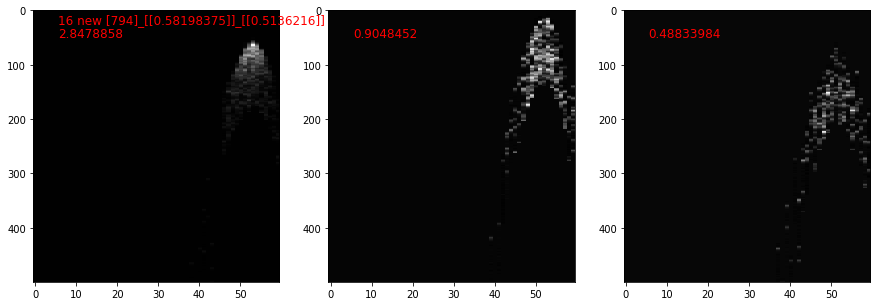

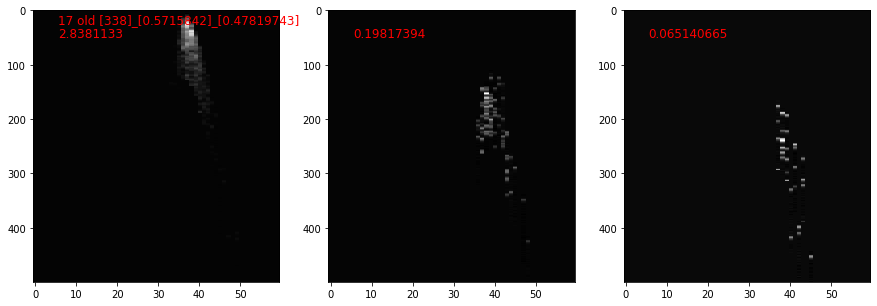

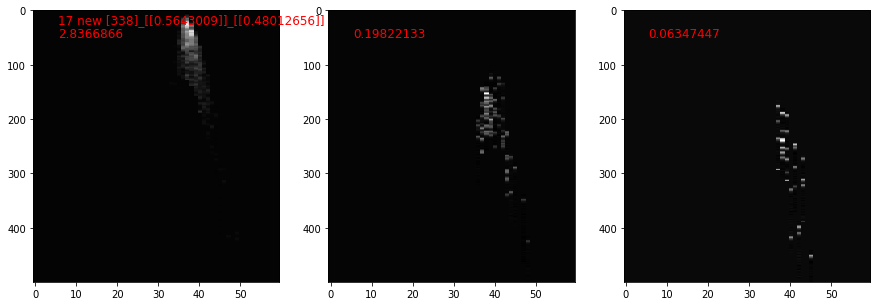

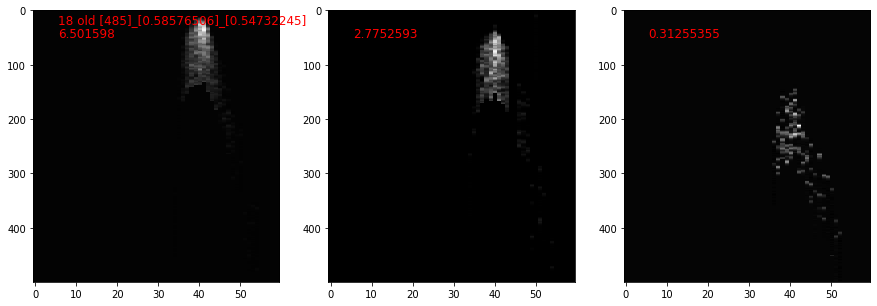

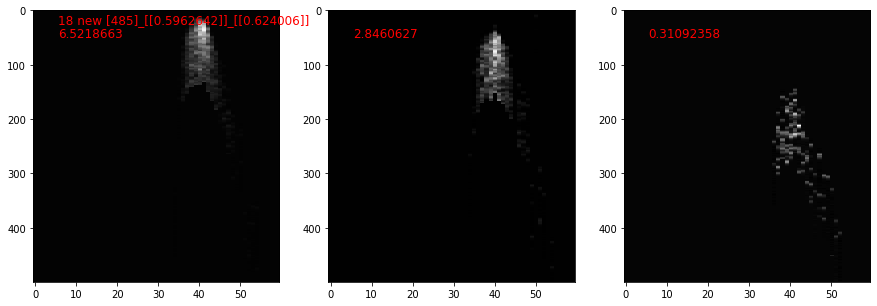

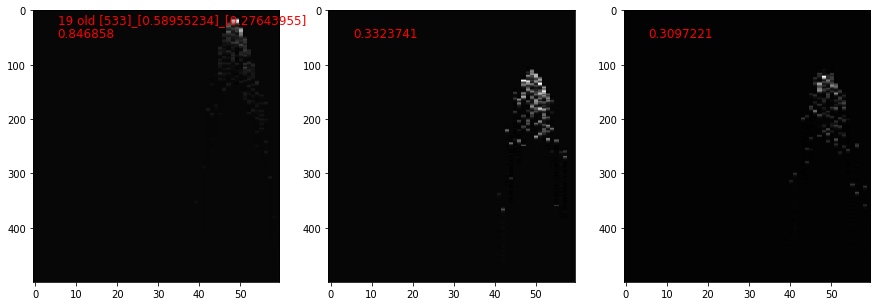

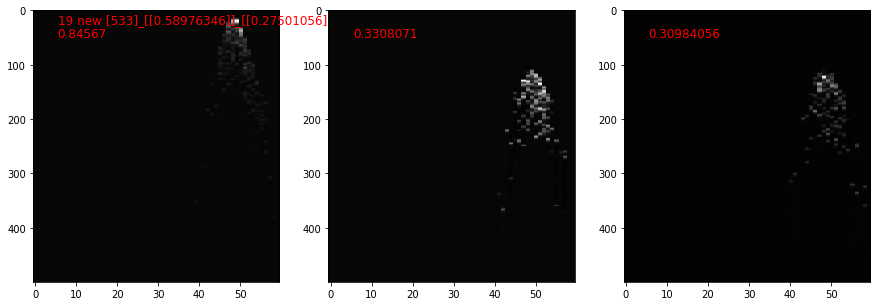

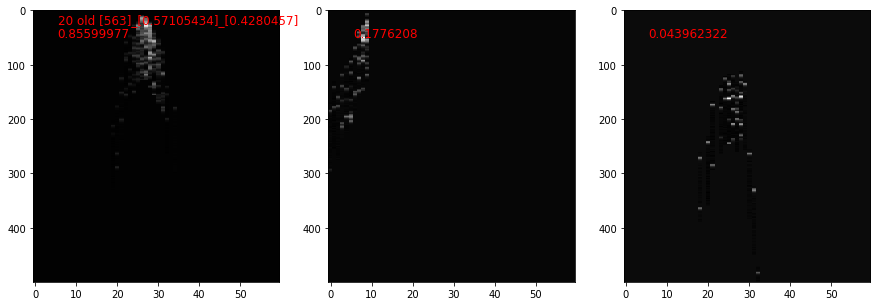

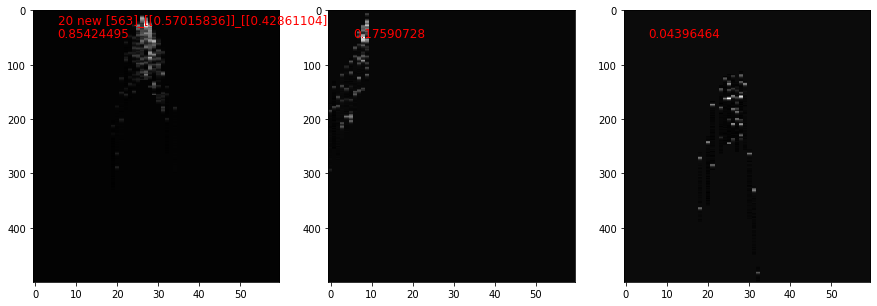

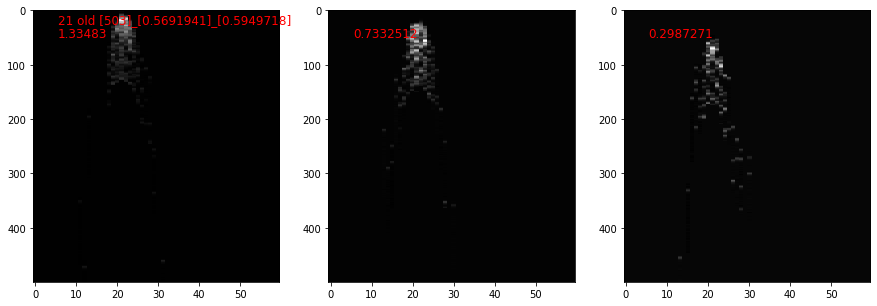

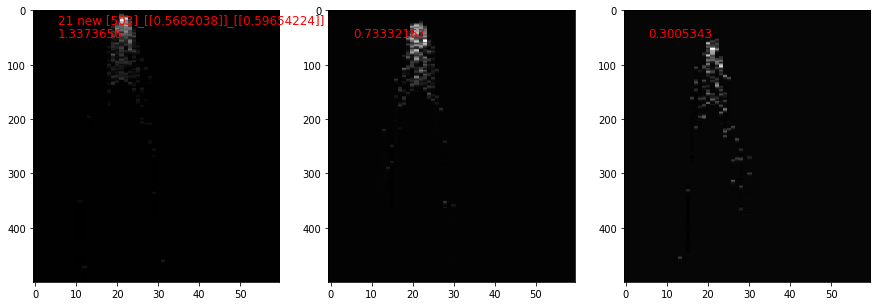

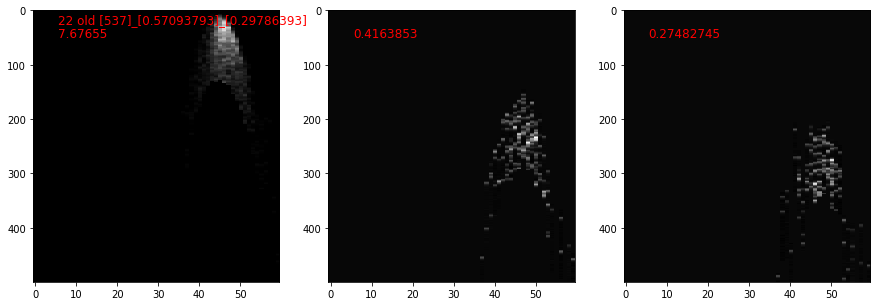

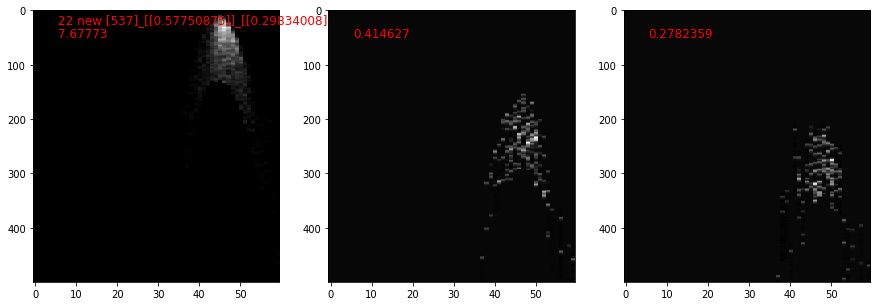

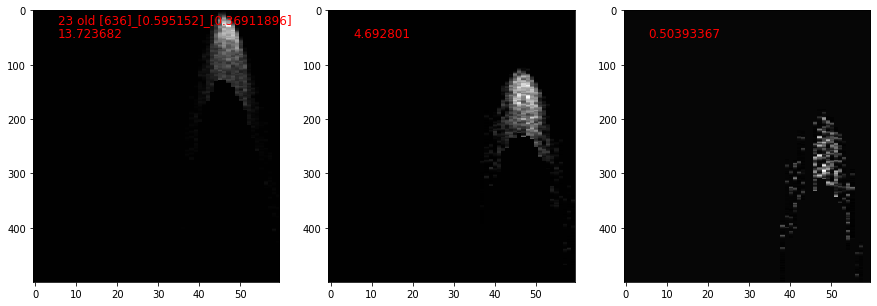

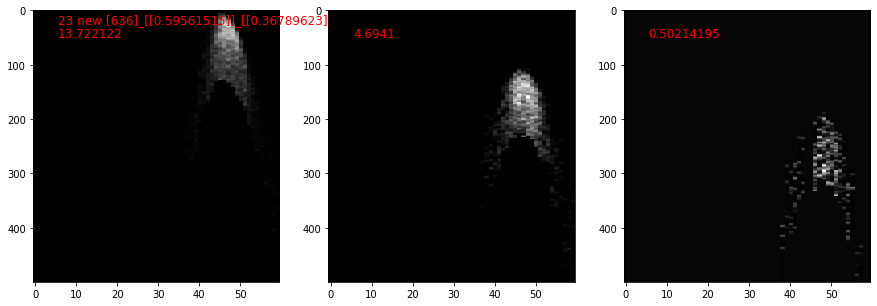

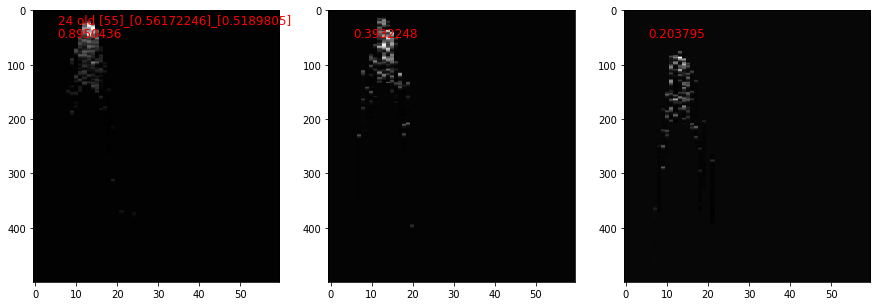

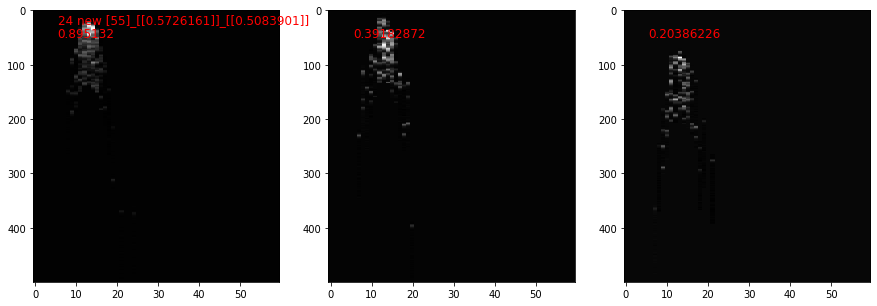

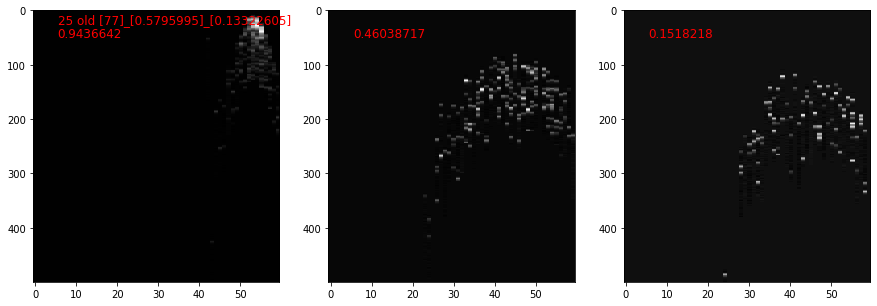

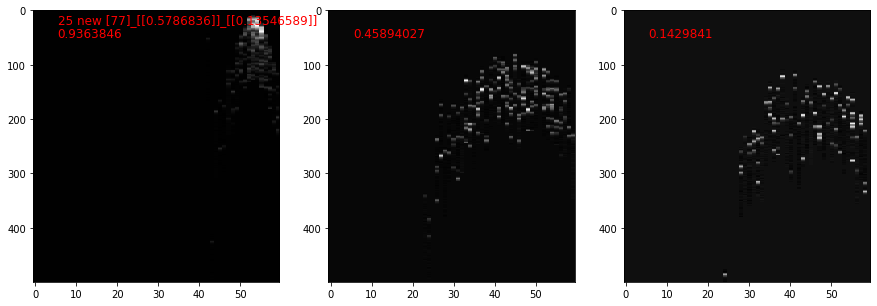

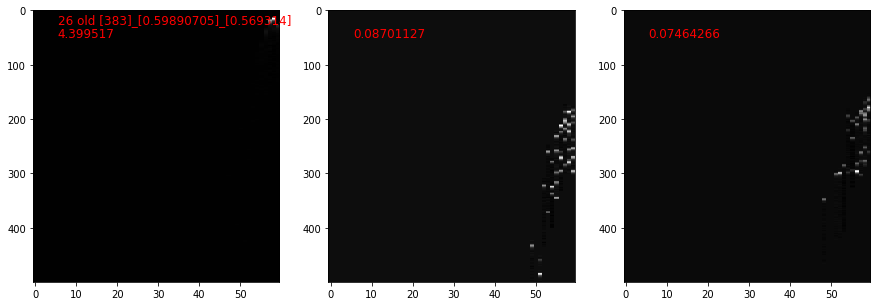

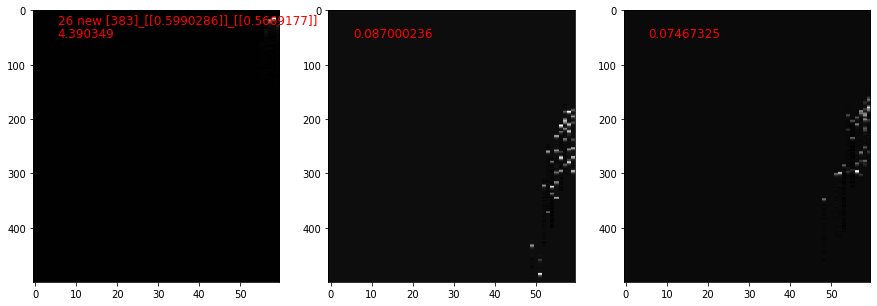

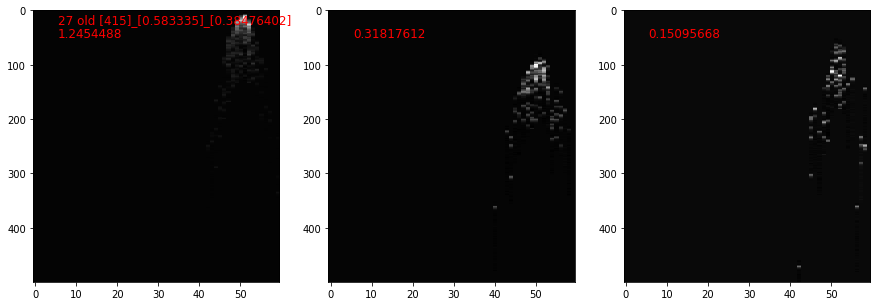

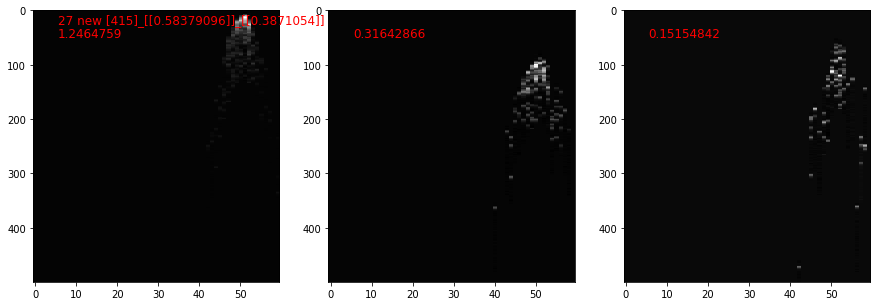

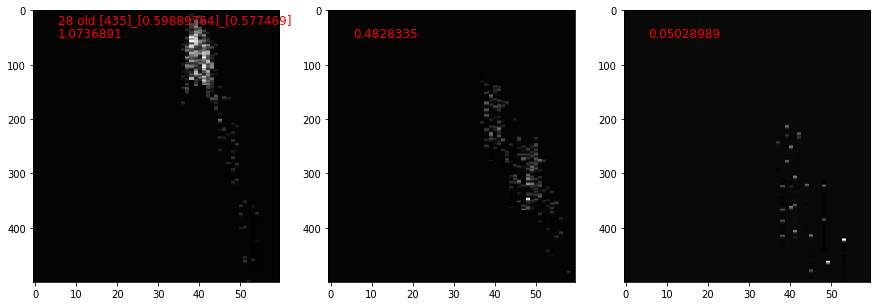

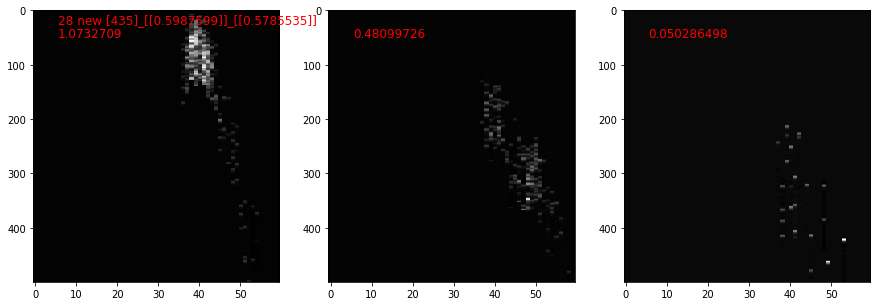

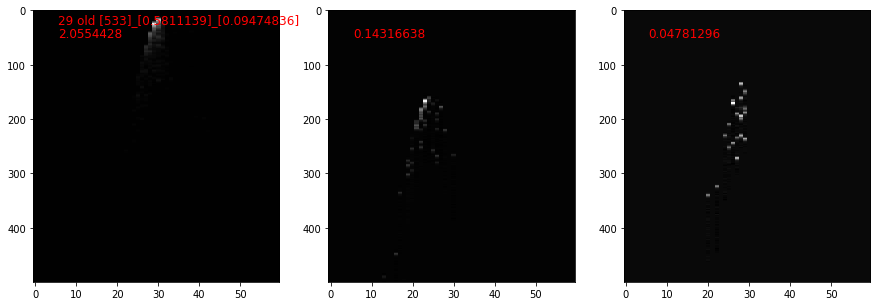

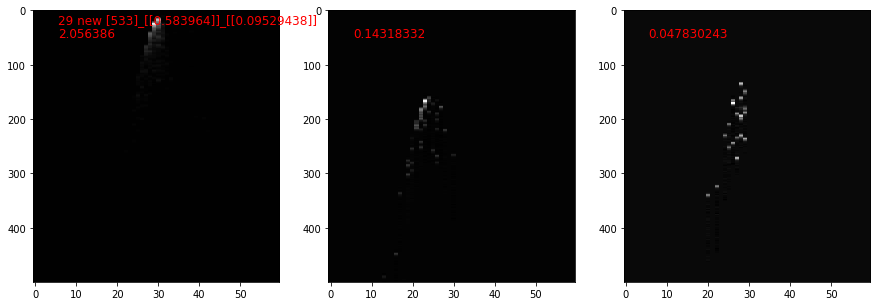

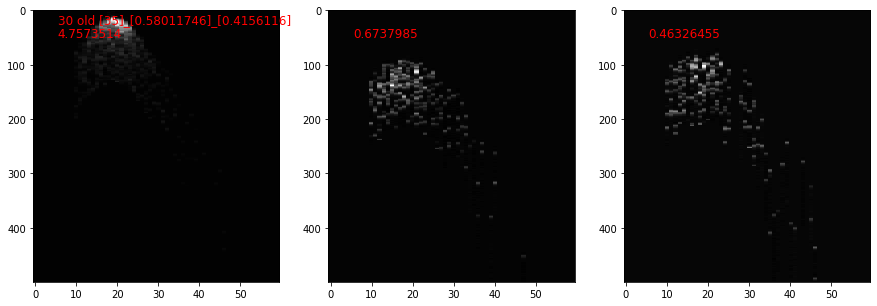

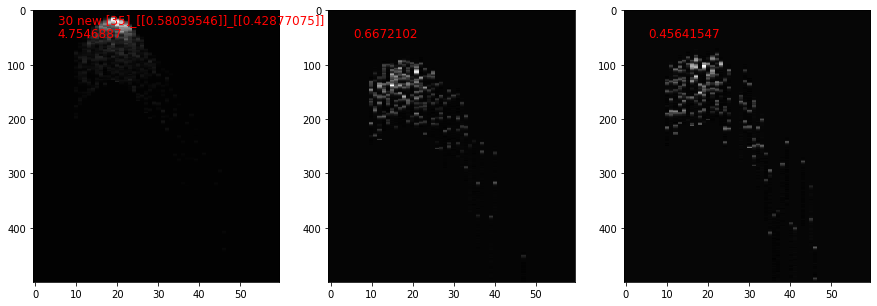

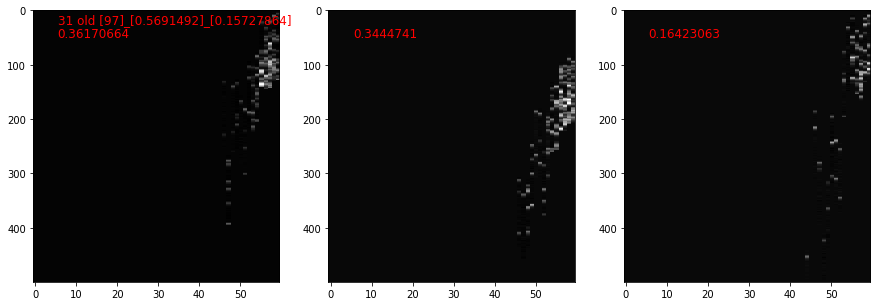

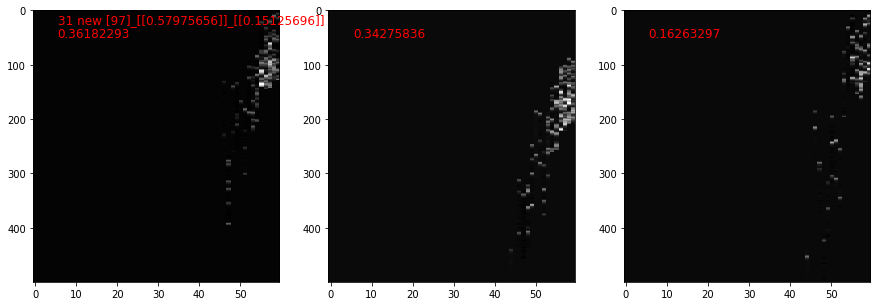

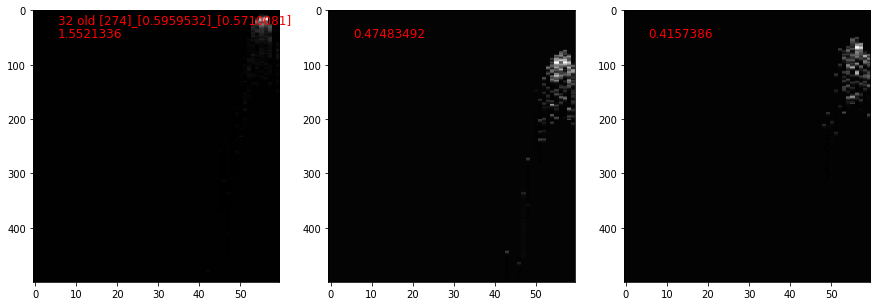

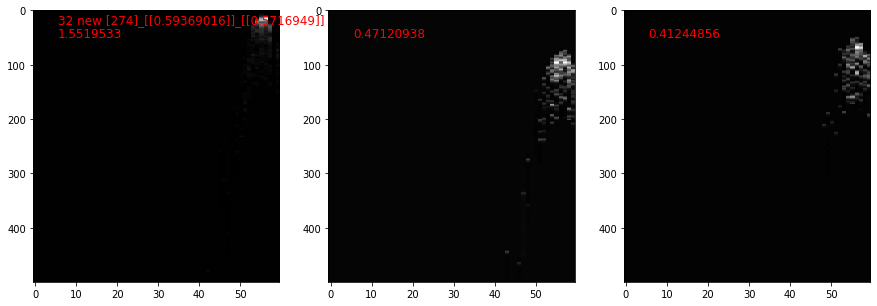

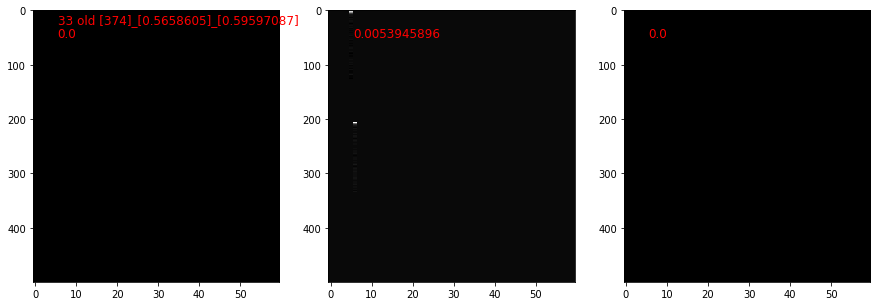

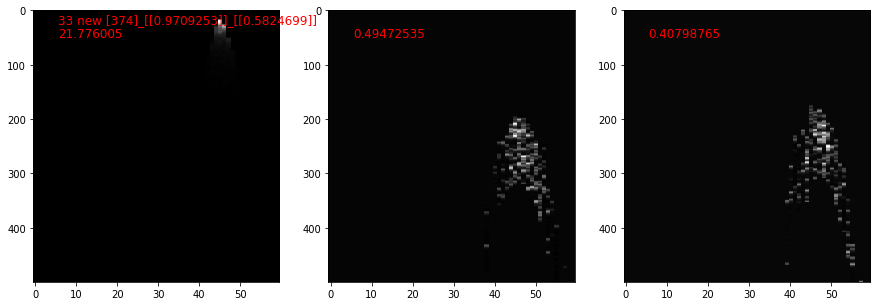

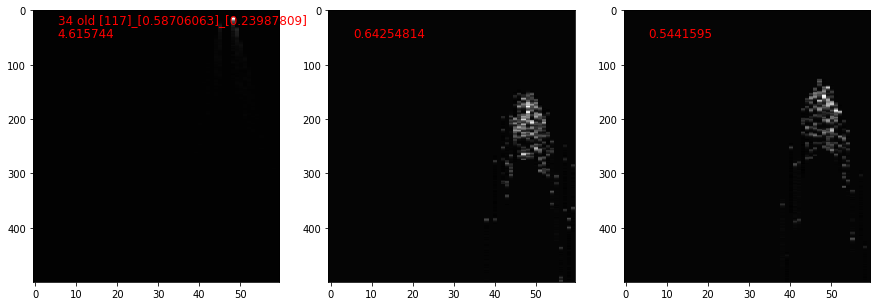

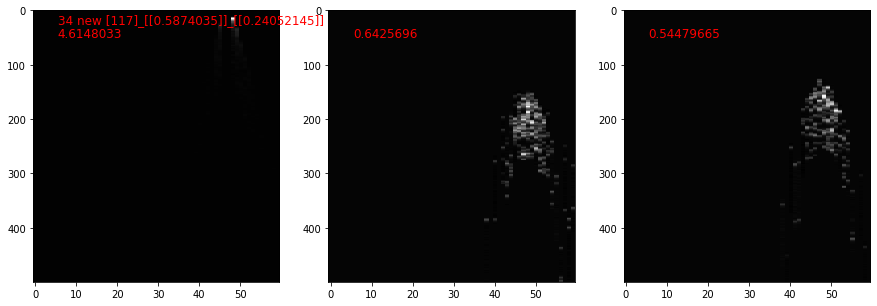

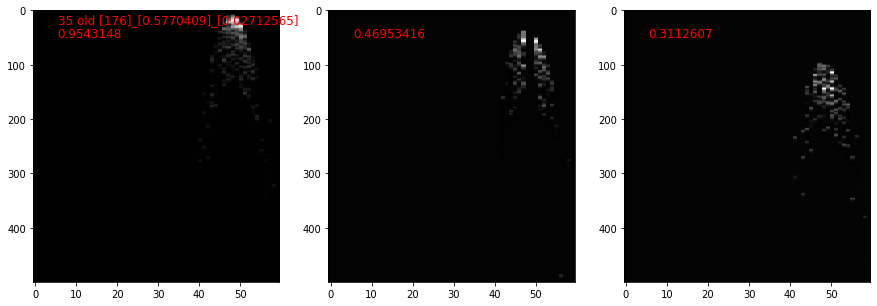

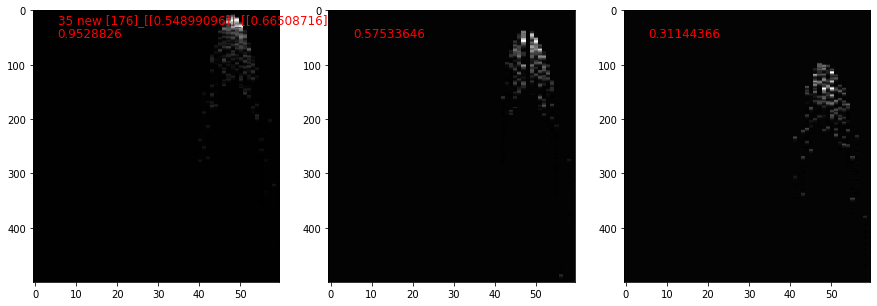

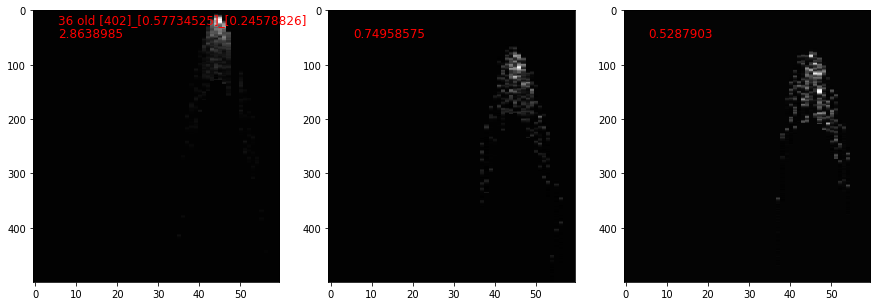

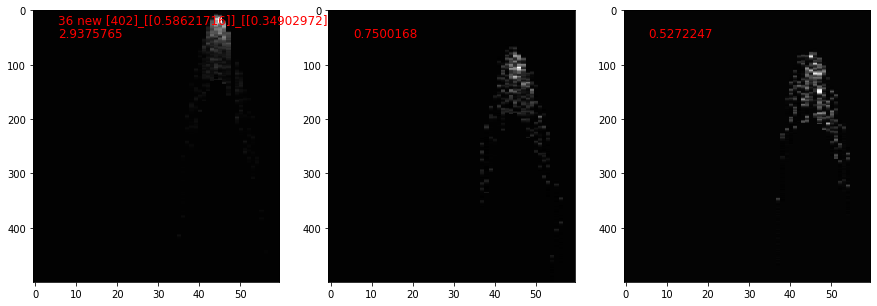

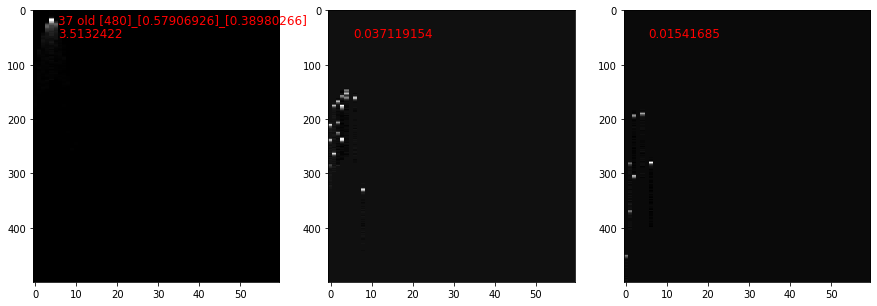

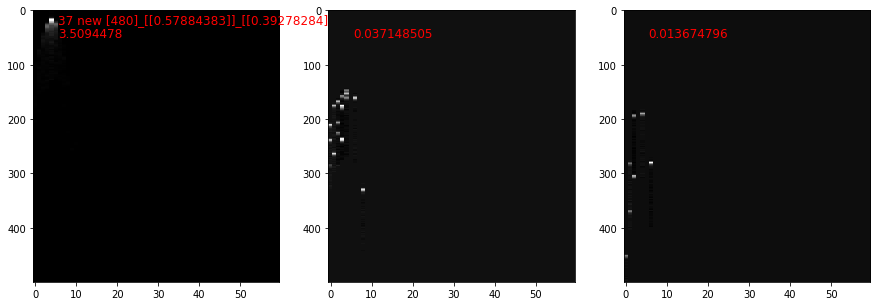

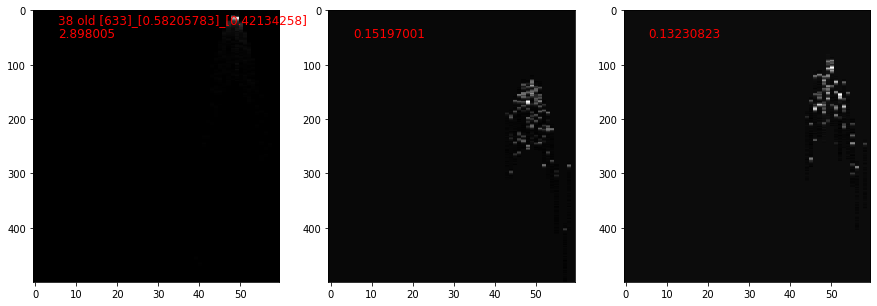

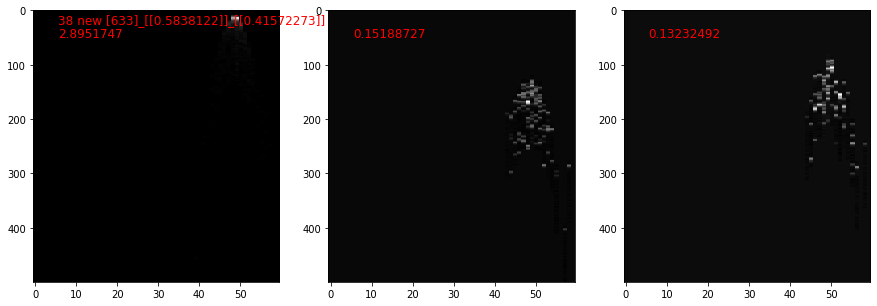

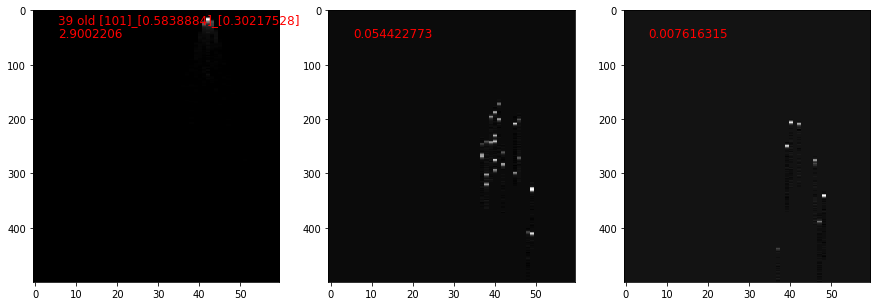

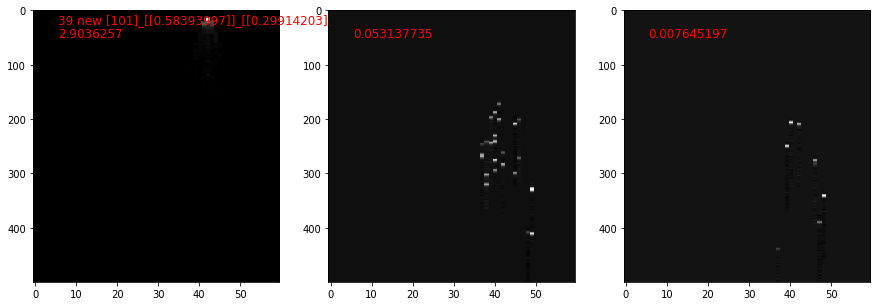

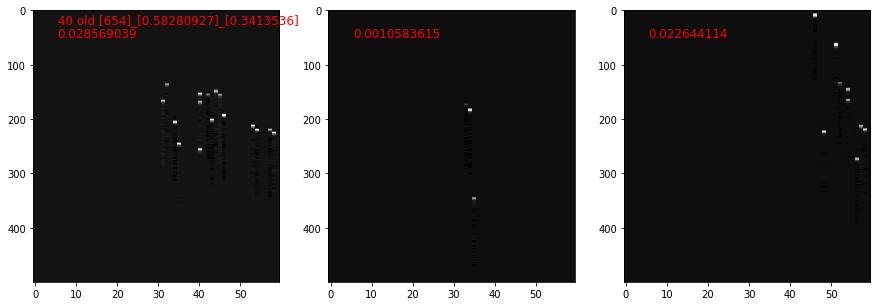

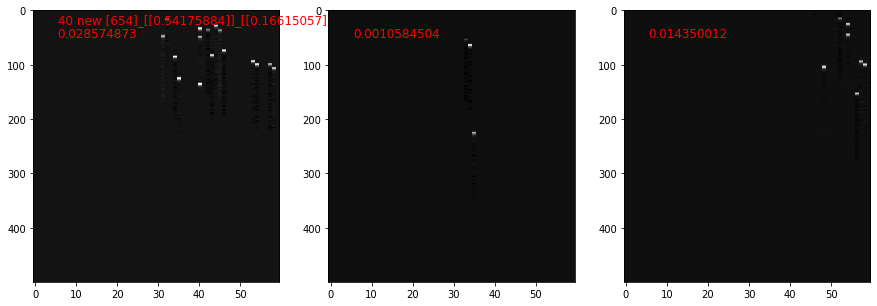

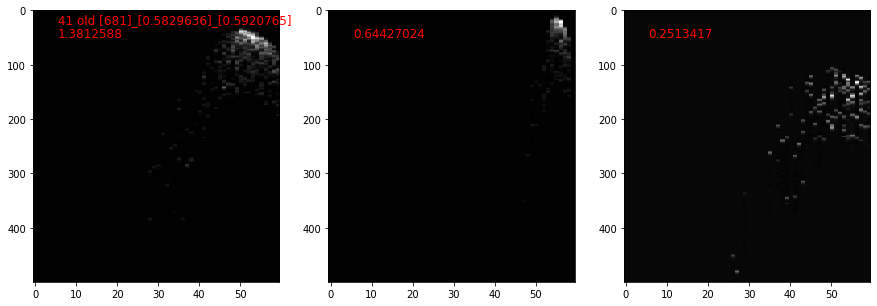

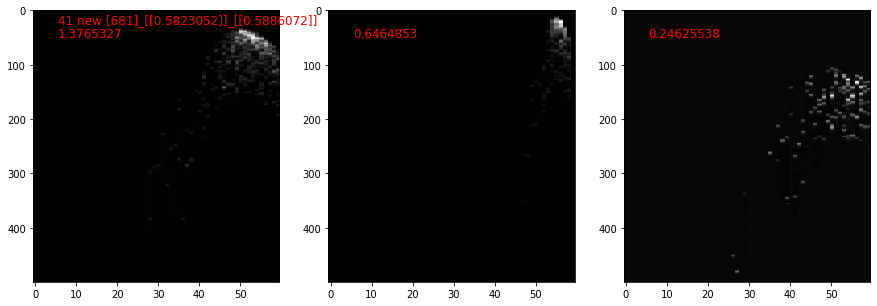

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
pos = 0
print(name)
z = np.load("/home/dup193/work/double_pulse/NuTau_Test_Images_shift_data.npz", mmap_mode="r")['arr_0']
start = time.time()
print('#.npz files = ',n_files)
for file_name in glob.glob('/home/dup193/work/double_pulse/data/images_3str/Images_'+name+'*'):
    if pos >200:
        break
    x = np.load(file_name, mmap_mode="r")['arr_0']
    print(file_name, x.shape)
    im = (x['image']-mean)/std
    pred_n1 = model.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    #pred_n2 = model_m.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    im = (x['image']-mean_3)/std_3
    #pred_n3 = model_3.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    pred_n4 = model_4.predict([im[:,0,:,:,:1],im[:,0,:,:,1:2],im[:,0,:,:,2:3]],batch_size =1)
    
    cut1=0.56
    cut2=0.6
    for n,e in enumerate(x):
        if pos >200:
            break
        ch = (cut1 <= pred_n1[n]) and (pred_n1[n] <= cut2) and (cut1 <= pred_n1[n]) and (pred_n4[n] <= cut2)
            #print(pos)
        if ch:
            if e['id'] in z['id']:
                e2 = z[z['id']==e['id']]
                im2 = (e2['image']-mean)/std
                #print(im2.shape,im2[0,:,:,2:3].shape)
                pred2_n1 = model.predict([im2[:,:,:,:1],im2[:,:,:,1:2],im2[:,:,:,2:3]],batch_size =1)
                im2 = (e2['image']-mean_3)/std_3
                pred2_n4 = model_4.predict([im2[:,:,:,:1],im2[:,:,:,1:2],im2[:,:,:,2:3]],batch_size =1)
    
                pos = pos +1
                fig = plt.figure(figsize=(15, 5))
                ax1 = fig.add_subplot(131)
                ax1.text(0.1,0.95,str(pos)+" old "+ str(e['id']['event_id'])+'_'+str(pred_n1[n])+'_'+str(pred_n4[n]),transform=ax1.transAxes, color = "r",fontsize=12)
                ax1.text(0.1,0.9,str(np.sum(e['image'][0][:,:,0])),transform=ax1.transAxes, color = "r",fontsize=12)
                ax1.imshow(e['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
                ax2 = fig.add_subplot(132)
                ax2.text(0.1,0.9,str(np.sum(e['image'][0][:,:,1])),transform=ax2.transAxes, color = "r",fontsize=12)
                ax2.imshow(e['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
                ax3 = fig.add_subplot(133)
                ax3.imshow(e['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
                ax3.text(0.1,0.9,str(np.sum(e['image'][0][:,:,2])),transform=ax3.transAxes, color = "r",fontsize=12)
                
                fig2 = plt.figure(figsize=(15, 5))
                ax1 = fig2.add_subplot(131)
                ax1.text(0.1,0.95,str(pos)+" new "+ str(e['id']['event_id'])+'_'+str(pred2_n1)+'_'+str(pred2_n4),transform=ax1.transAxes, color = "r",fontsize=12)
                ax1.text(0.1,0.9,str(np.sum(e2['image'][0][:,:,0])),transform=ax1.transAxes, color = "r",fontsize=12)
                ax1.imshow(e2['image'][0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
                ax2 = fig2.add_subplot(132)
                ax2.text(0.1,0.9,str(np.sum(e2['image'][0][:,:,1])),transform=ax2.transAxes, color = "r",fontsize=12)
                ax2.imshow(e2['image'][0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
                ax3 = fig2.add_subplot(133)
                ax3.text(0.1,0.9,str(np.sum(e2['image'][0][:,:,2])),transform=ax3.transAxes, color = "r",fontsize=12)
                ax3.imshow(e2['image'][0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')

end = time.time()
print(end - start)